In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
import pandas as pd
df_train=pd.read_csv(r'/kaggle/input/train.csv')
df_test=pd.read_csv(r'/kaggle/input/test.csv')

# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
from scipy import stats 
import matplotlib.style as style
import missingno as msno
import warnings
%matplotlib inline


# **Data Pre-processing**

In [4]:
print("Train shape",df_train.shape)
print("Test shape",df_test.shape)

Train shape (550068, 12)
Test shape (233599, 11)


In [5]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
## for train data 
df_train.duplicated().sum()

0

In [8]:
## for test data
df_test.duplicated().sum()

0

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [11]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Maximum value for Occupation is 20 and mean value is around 8.07 The maximum purchase amount for the customers is 23961.0 whereas the minimum purchase amount is 12.0

In [12]:

##**Converting the dtype of ' Stay_In_Current_City_Years'**
###(convert obj intto int)
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].str.replace('+','')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


In [13]:
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].astype(int)
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


In [14]:
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].str.replace('+','')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [15]:
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].astype(int)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [16]:
## Dropping User_id and Product_ID
df_train=df_train.drop('User_ID',axis=1)
df_test=df_test.drop('User_ID',axis=1)
df_train=df_train.drop('Product_ID',axis=1)
df_test=df_test.drop('Product_ID',axis=1)

# **Performing EDA**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

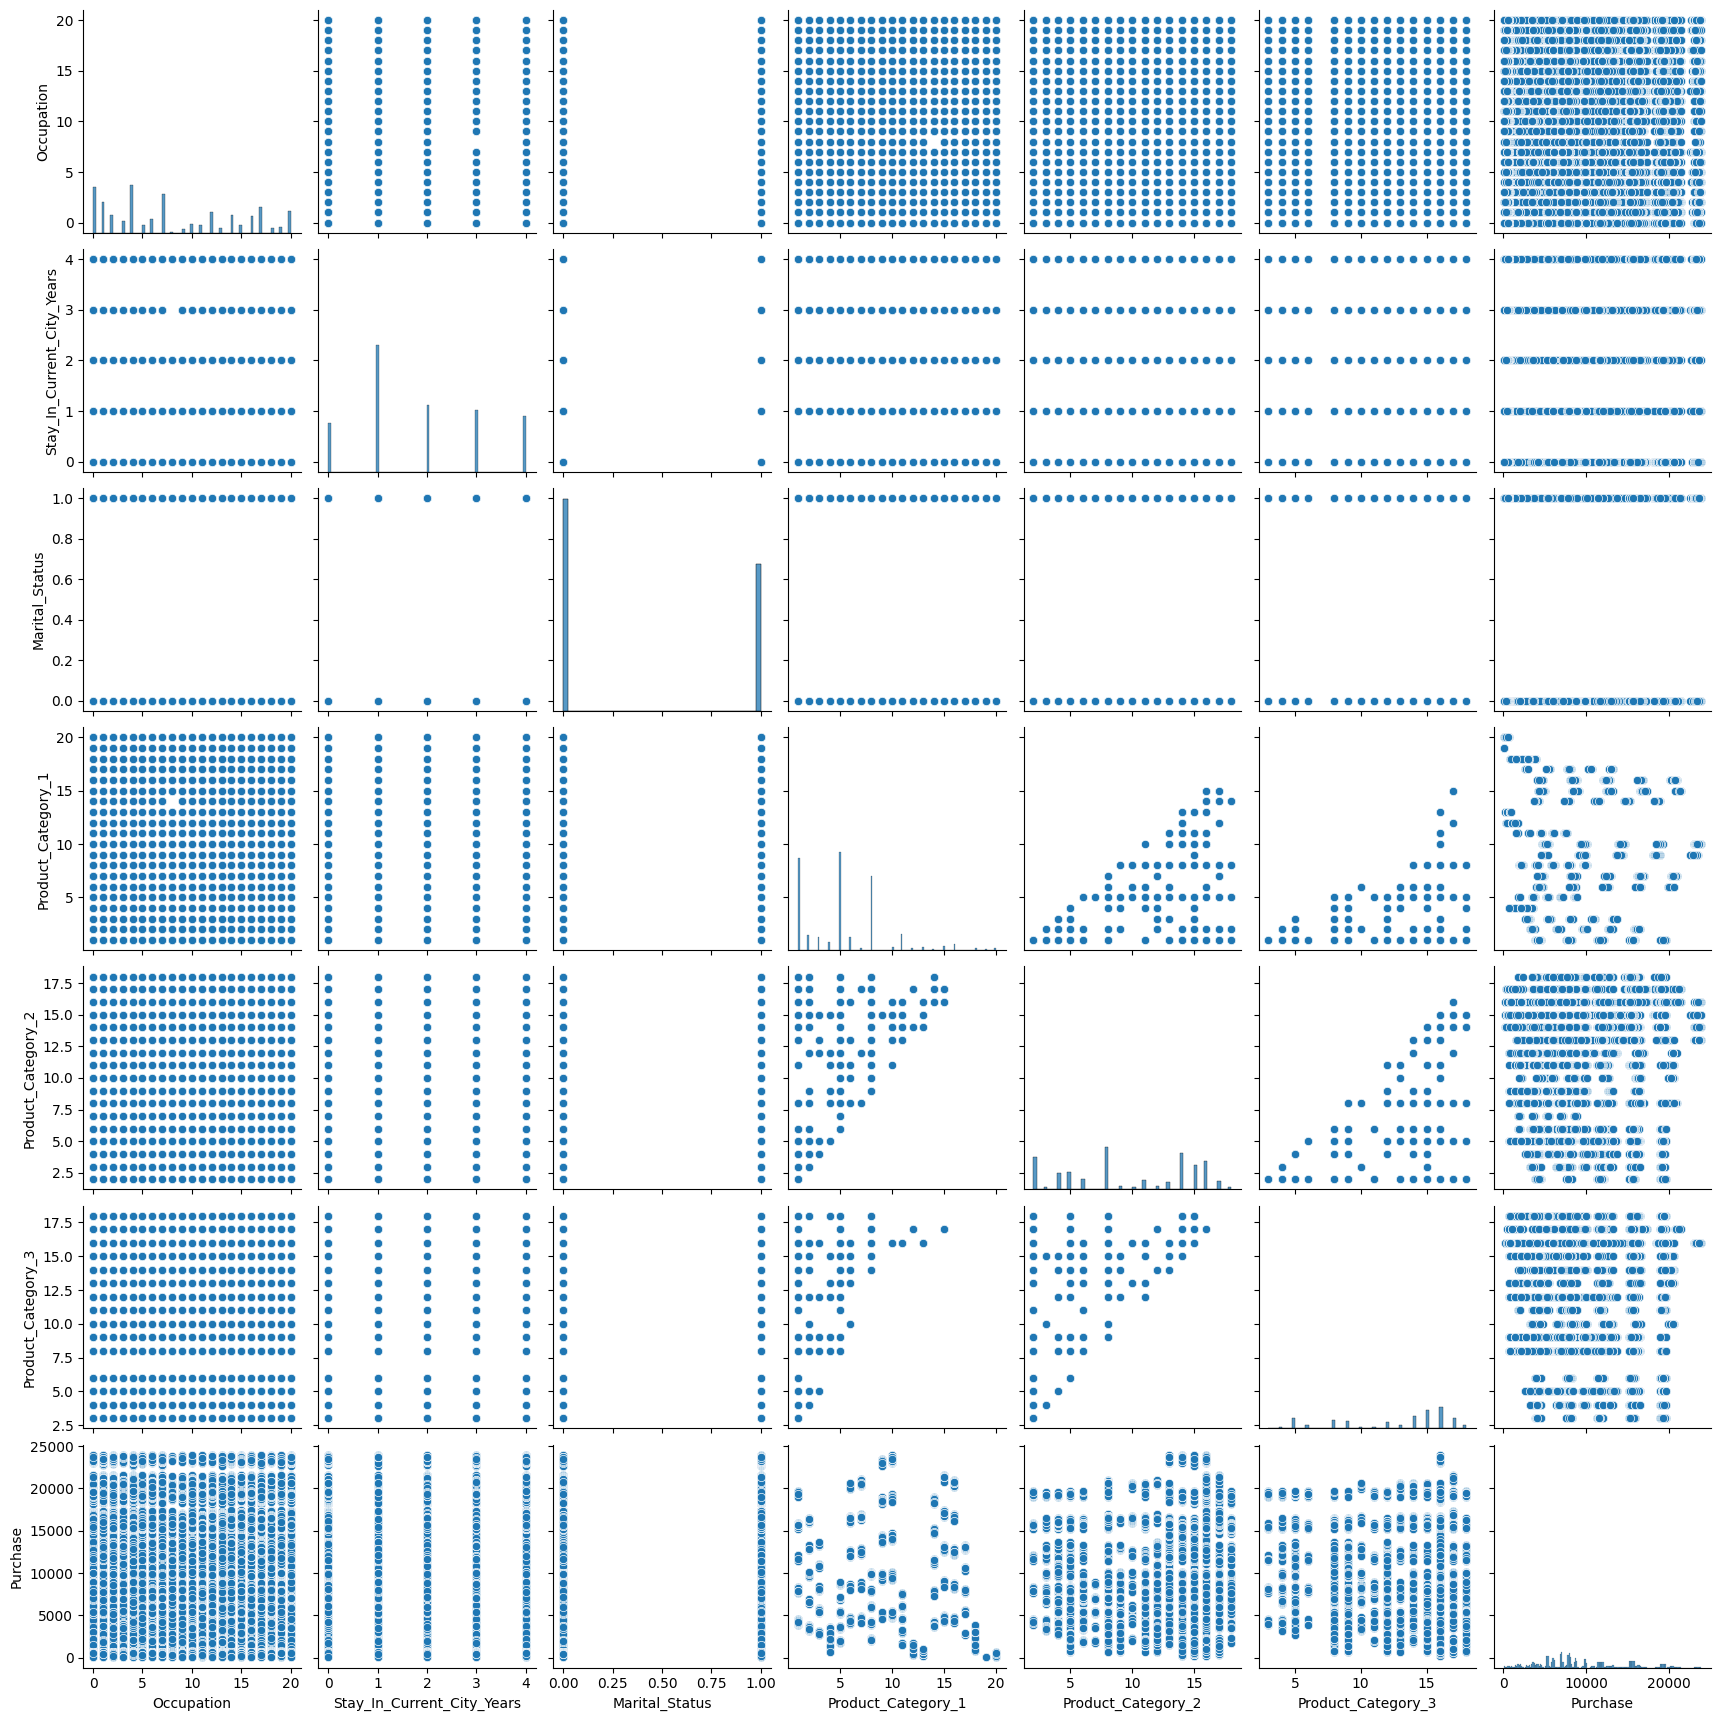

In [17]:
sns.pairplot(df_train)

/tmp/ipykernel_19/679337835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Purchase'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


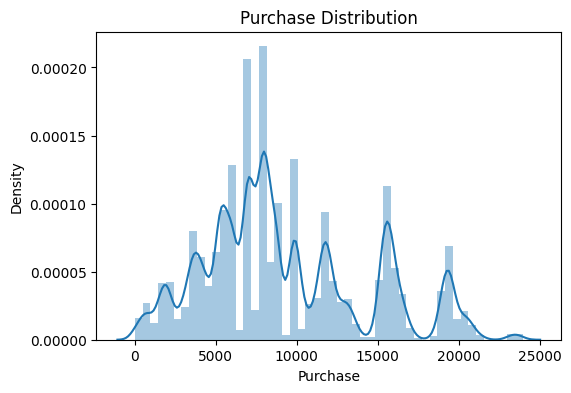

In [18]:
plt.figure(figsize=(6,4))
sns.distplot(df_train['Purchase'])
plt.title("Purchase Distribution")
plt.show()

Gender
M    414259
F    135809
Name: count, dtype: int64


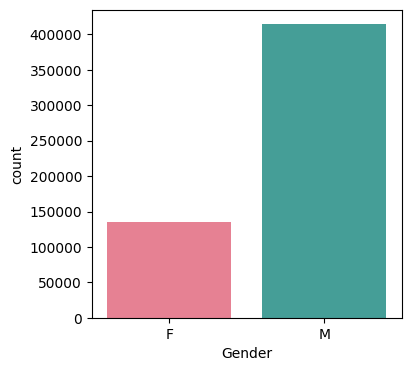

<Axes: ylabel='count'>

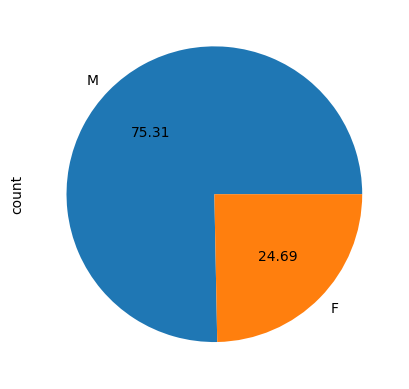

In [19]:
print(df_train['Gender'].value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x='Gender',data=df_train,palette='husl')
plt.show()
df_train['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

We observe that male customers have done more transactions than female customers during BlackFriday Sale.


City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


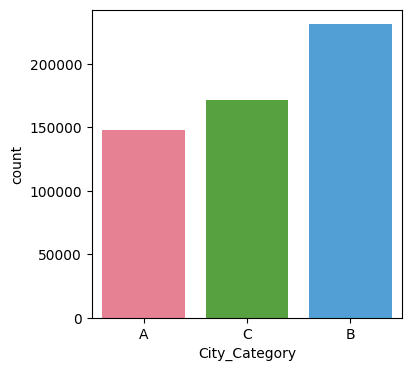

<Axes: ylabel='count'>

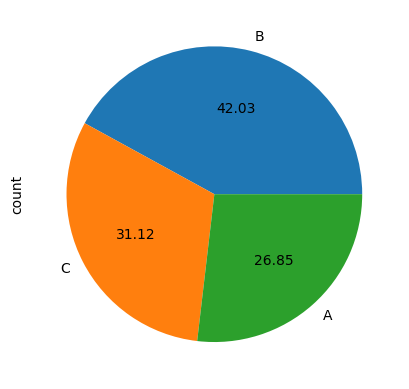

In [20]:
print(df_train['City_Category'].value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x='City_Category',data=df_train,palette='husl')
plt.show()
df_train['City_Category'].value_counts().plot(kind='pie',autopct='%.2f')

We can see that B has made the most no. of purchases followed by c.

Marital_Status
0    324731
1    225337
Name: count, dtype: int64


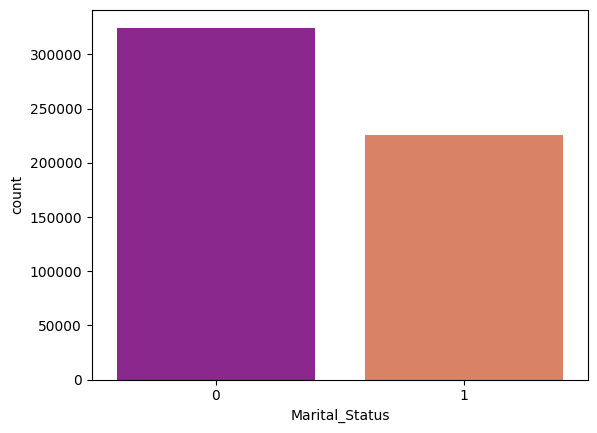

<Figure size 400x400 with 0 Axes>

<Axes: ylabel='count'>

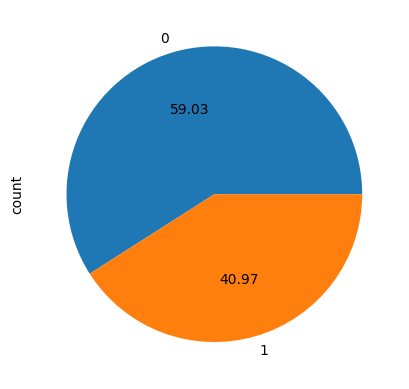

In [21]:
print(df_train['Marital_Status'].value_counts())
sns.countplot(x='Marital_Status',data=df_train,palette='plasma')
plt.figure(figsize=(4,4))
plt.show()
df_train['Marital_Status'].value_counts().plot(kind='pie',autopct='%.2f')

There are more unmarried customers who purchases more during BlackFriday Sale.

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


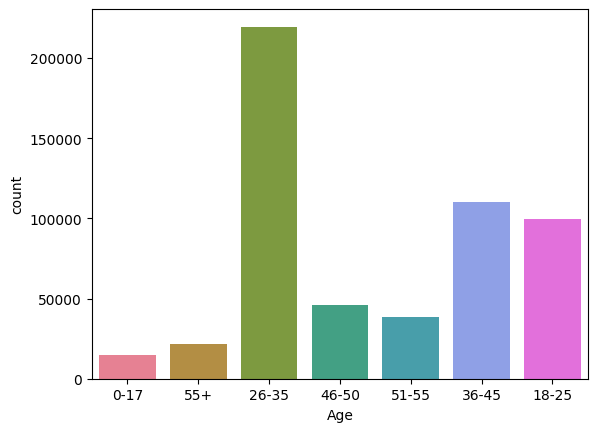

<Figure size 400x400 with 0 Axes>

In [22]:
print(df_train['Age'].value_counts())
sns.countplot(x='Age',data=df_train,palette='husl')
plt.figure(figsize=(4,4))
plt.show()

Here we observe that age between 26-35 has made more purchases

Stay_In_Current_City_Years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64


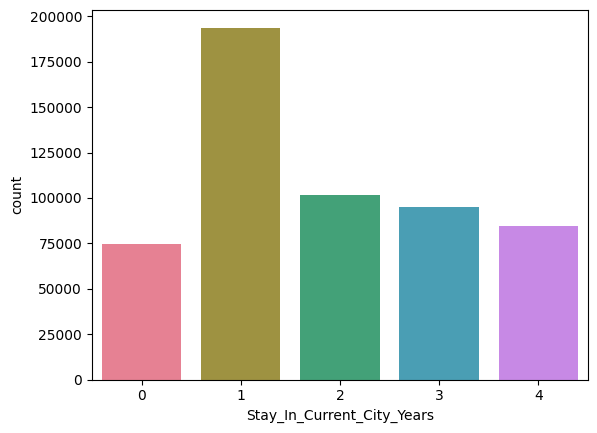

<Figure size 400x400 with 0 Axes>

In [23]:
print(df_train['Stay_In_Current_City_Years'].value_counts())
sns.countplot(x='Stay_In_Current_City_Years',data=df_train,palette='husl')
plt.figure(figsize=(4,4))
plt.show()

we can clearly see that the longest customers is living in that city are less prone to purchase but the newest customers in that city are more prone to buy new things during sale.

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


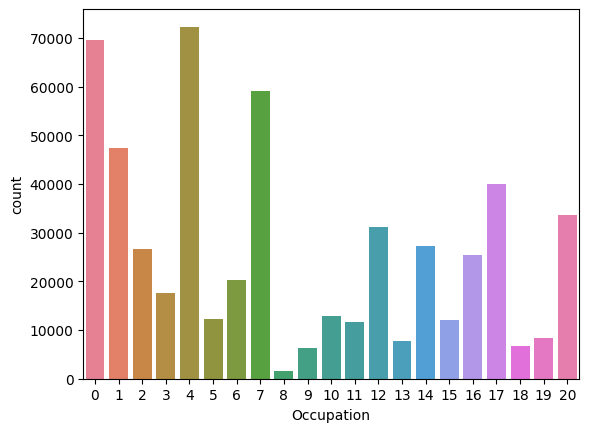

<Figure size 400x400 with 0 Axes>

In [24]:
print(df_train['Occupation'].value_counts())
sns.countplot(x='Occupation',data=df_train,palette='husl')
plt.figure(figsize=(4,4))
plt.show()

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64


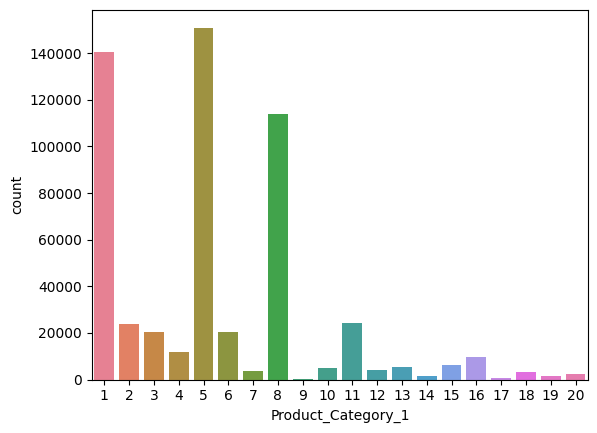

<Figure size 400x400 with 0 Axes>

In [25]:
print(df_train['Product_Category_1'].value_counts())
sns.countplot(x='Product_Category_1',data=df_train,palette='husl')
plt.figure(figsize=(4,4))
plt.show()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64


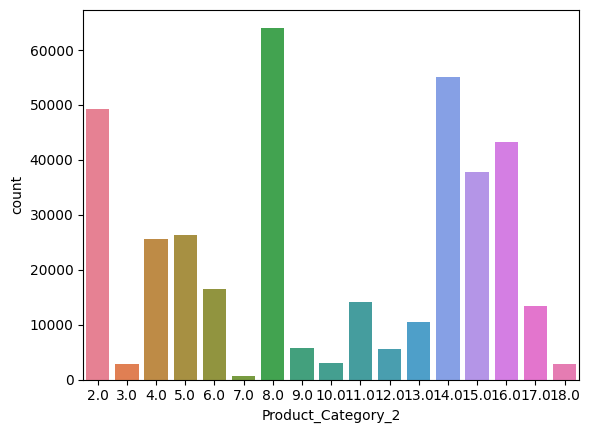

<Figure size 400x400 with 0 Axes>

In [26]:
print(df_train['Product_Category_2'].value_counts())
sns.countplot(x='Product_Category_2',data=df_train,palette='husl')
plt.figure(figsize=(4,4))
plt.show()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64


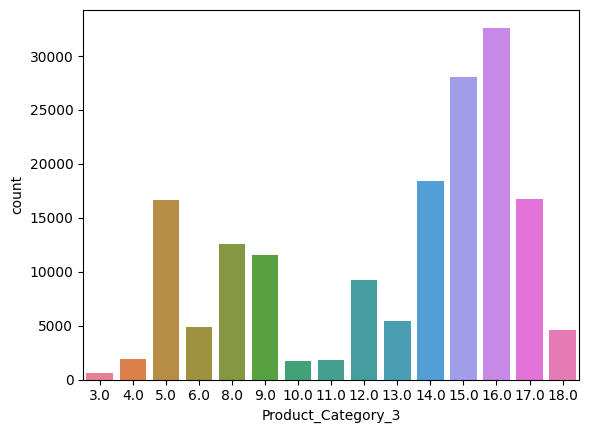

<Figure size 400x400 with 0 Axes>

In [27]:
print(df_train['Product_Category_3'].value_counts())
sns.countplot(x='Product_Category_3',data=df_train,palette='husl')
plt.figure(figsize=(4,4))
plt.show()

## Analyzing each independent columns with target column

/tmp/ipykernel_19/1136390259.py:1: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='Age', values='Purchase',aggfunc=np.mean)


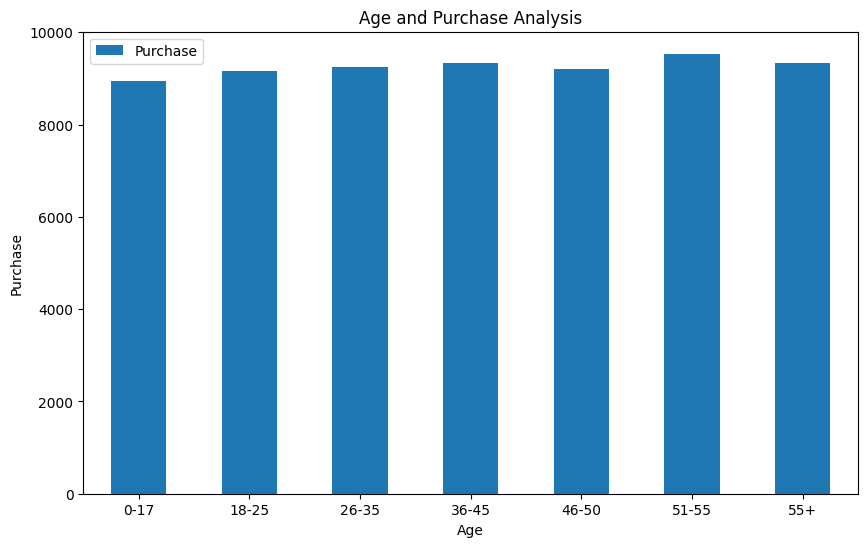

In [28]:
occupation_plot = df_train.pivot_table(index='Age', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_19/3472658599.py:1: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='City_Category', values='Purchase',aggfunc=np.mean)


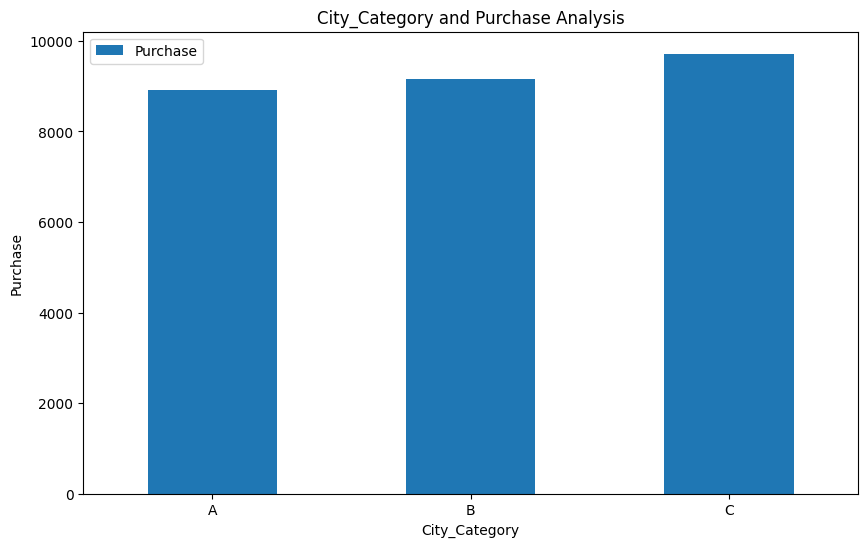

In [29]:
occupation_plot = df_train.pivot_table(index='City_Category', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City_Category')
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_19/3552192734.py:1: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='Gender', values='Purchase',aggfunc=np.mean)


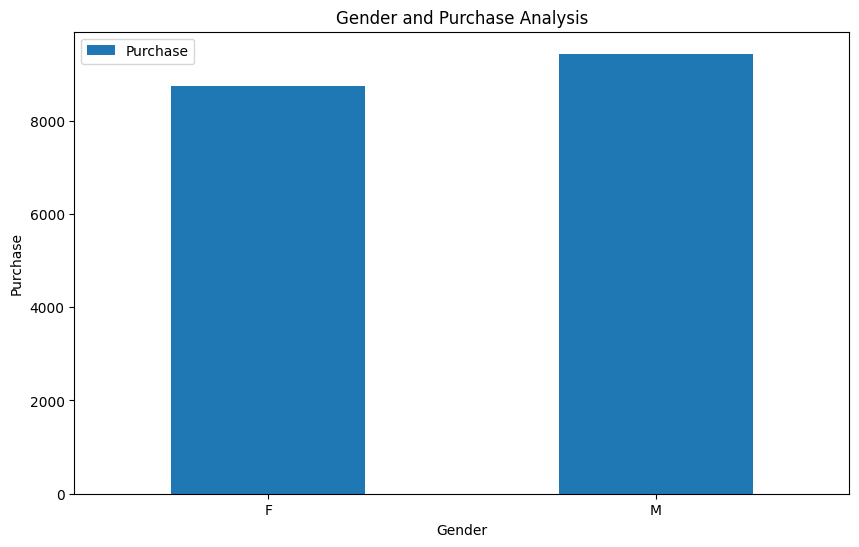

In [30]:
occupation_plot = df_train.pivot_table(index='Gender', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_19/2592665390.py:1: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='Stay_In_Current_City_Years', values='Purchase',aggfunc=np.mean)


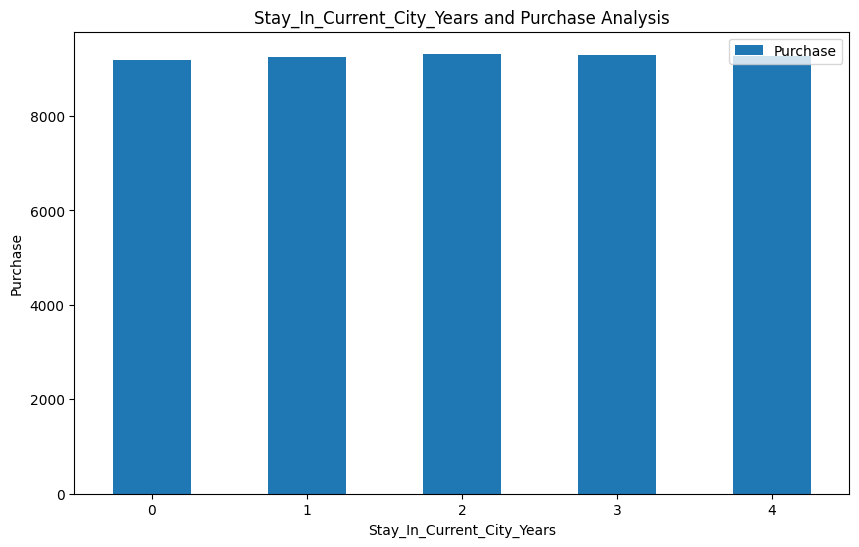

In [31]:
occupation_plot = df_train.pivot_table(index='Stay_In_Current_City_Years', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_19/2626896491.py:2: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='Occupation', values='Purchase',aggfunc=np.mean)


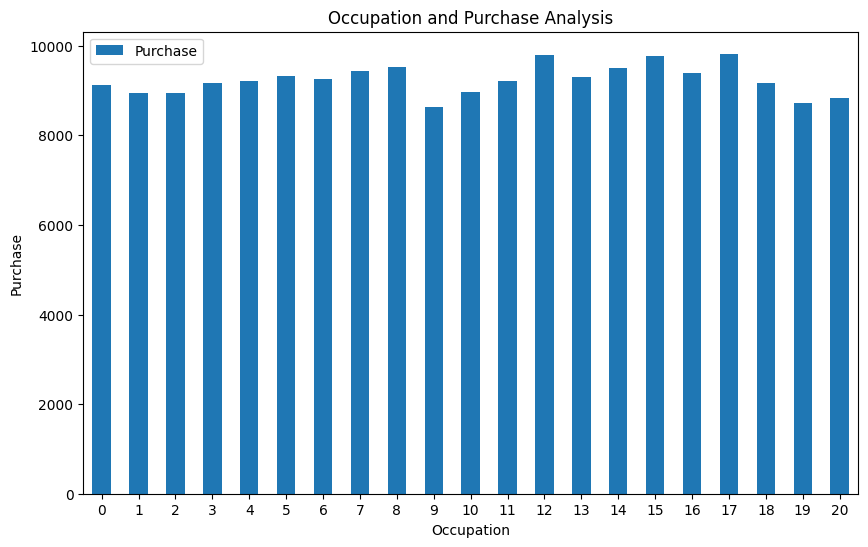

In [32]:
## we can also use groupby() function
occupation_plot = df_train.pivot_table(index='Occupation', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_19/3731284600.py:1: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='Product_Category_1', values='Purchase',aggfunc=np.mean)


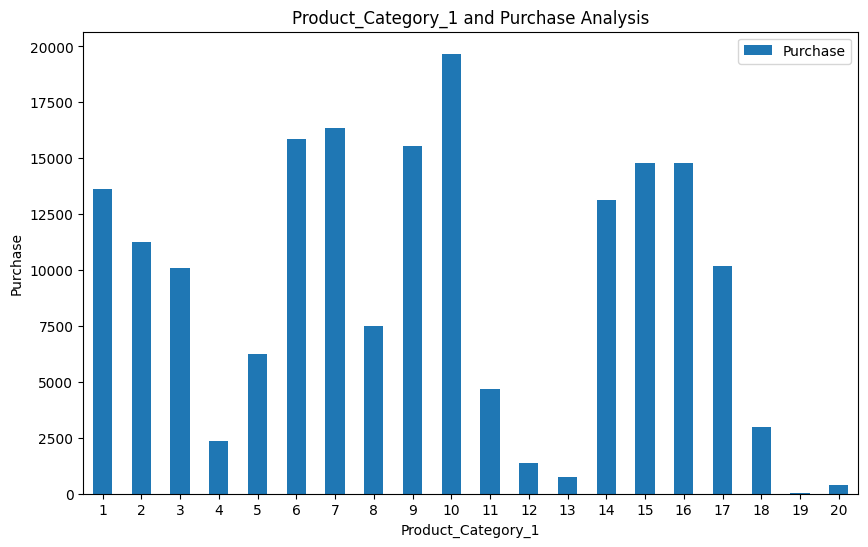

In [33]:
occupation_plot = df_train.pivot_table(index='Product_Category_1', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product_Category_1')
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_19/2983587201.py:1: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='Product_Category_2', values='Purchase',aggfunc=np.mean)


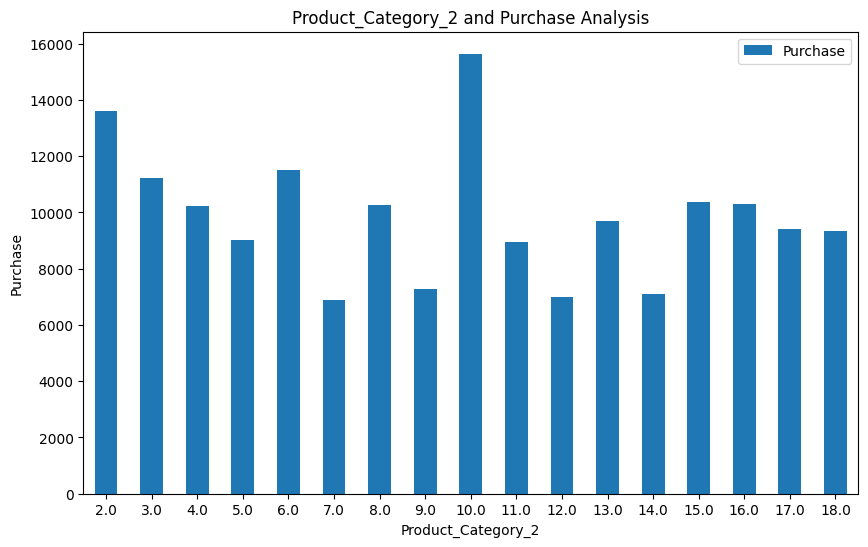

In [34]:
occupation_plot = df_train.pivot_table(index='Product_Category_2', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product_Category_2')
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_19/3476479494.py:1: FutureWarning: The provided callable <function mean at 0x7de41c1f44c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  occupation_plot = df_train.pivot_table(index='Product_Category_3', values='Purchase',aggfunc=np.mean)


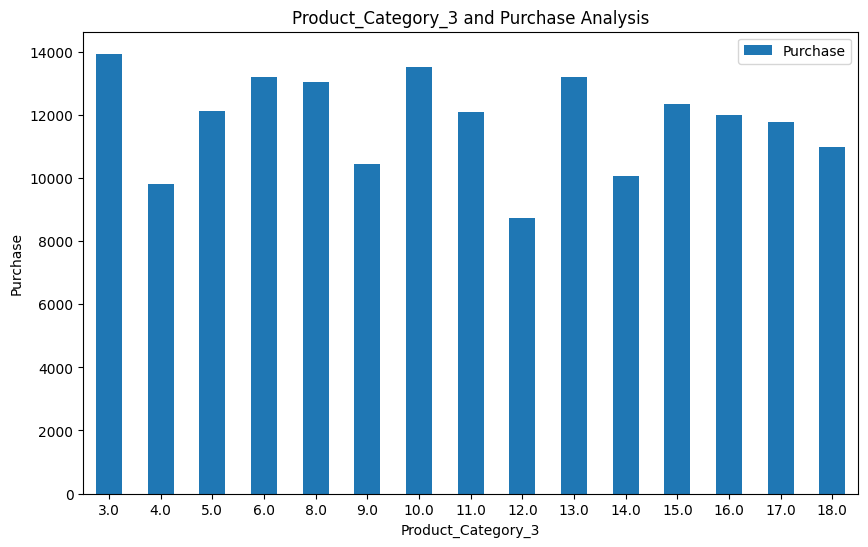

In [35]:
occupation_plot = df_train.pivot_table(index='Product_Category_3', values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product_Category_3')
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase'>

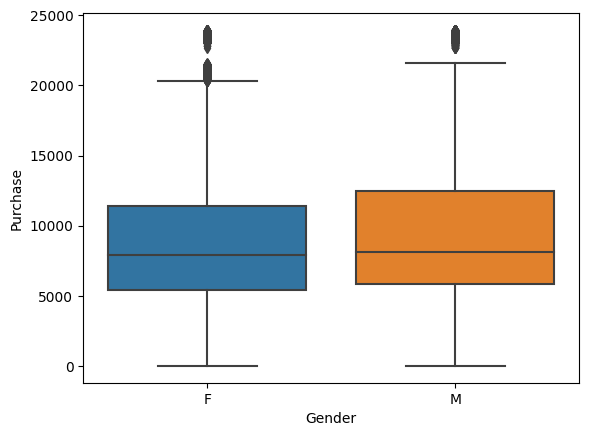

In [36]:
## Using boxplot for outliers detection
sns.boxplot(x=df_train['Gender'],y=df_train['Purchase'])

<Axes: xlabel='Age', ylabel='Purchase'>

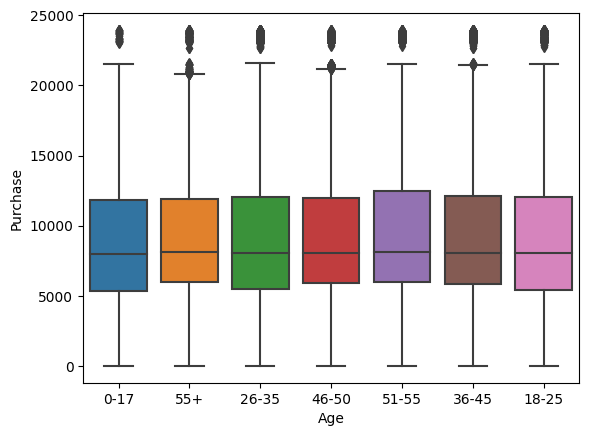

In [37]:
sns.boxplot(x=df_train['Age'],y=df_train['Purchase'])

<Axes: xlabel='Occupation', ylabel='Purchase'>

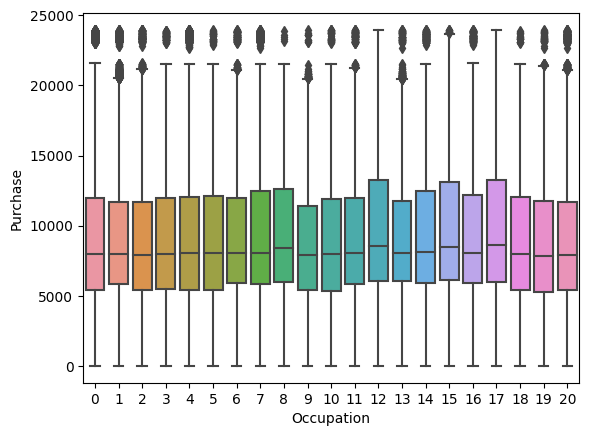

In [38]:
sns.boxplot(x=df_train['Occupation'],y=df_train['Purchase'])

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

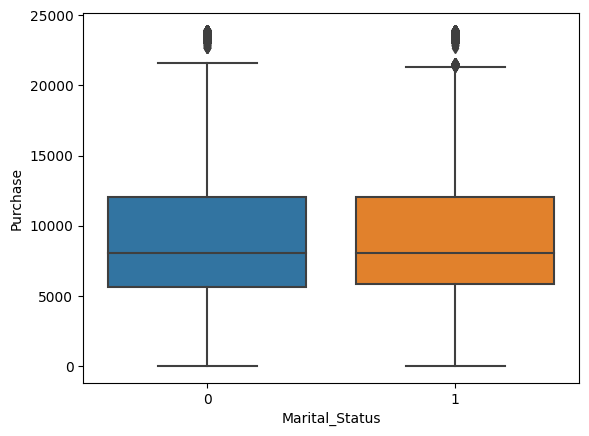

In [39]:
sns.boxplot(x=df_train['Marital_Status'],y=df_train['Purchase'])

<Axes: xlabel='City_Category', ylabel='Purchase'>

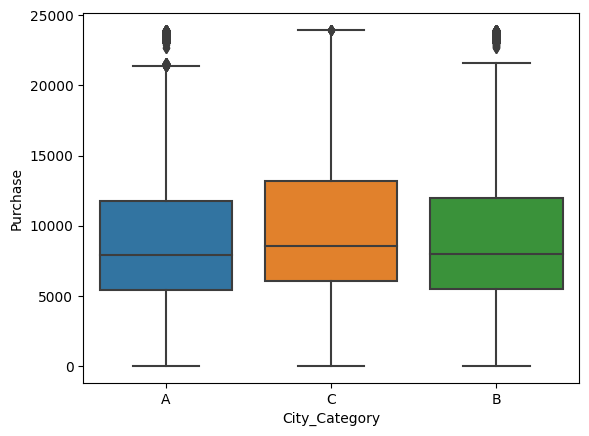

In [40]:
sns.boxplot(x=df_train['City_Category'],y=df_train['Purchase'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

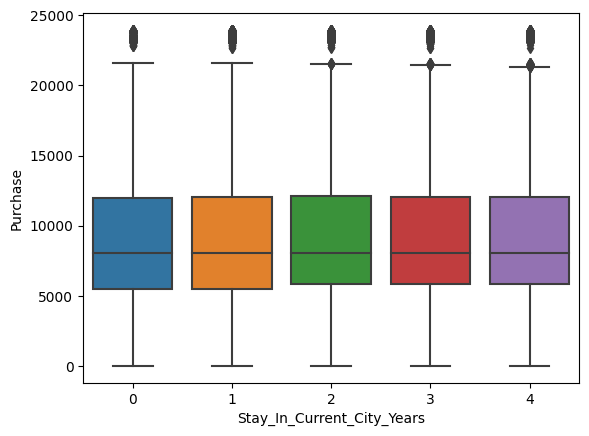

In [41]:
sns.boxplot(x=df_train['Stay_In_Current_City_Years'],y=df_train['Purchase'])

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

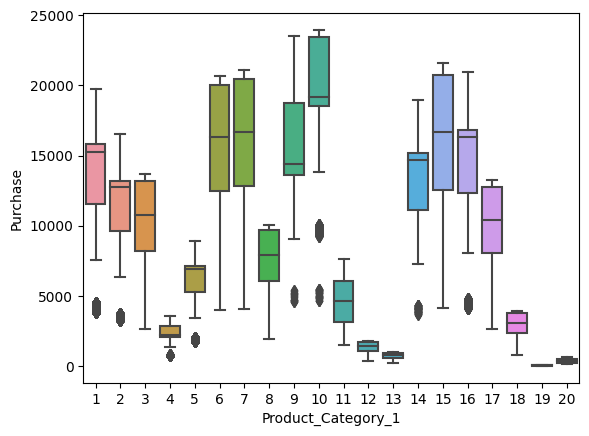

In [42]:
sns.boxplot(x=df_train['Product_Category_1'],y=df_train['Purchase'])

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

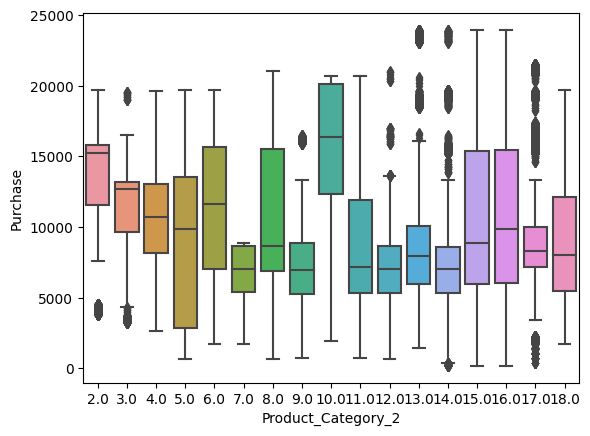

In [43]:
sns.boxplot(x=df_train['Product_Category_2'],y=df_train['Purchase'])

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

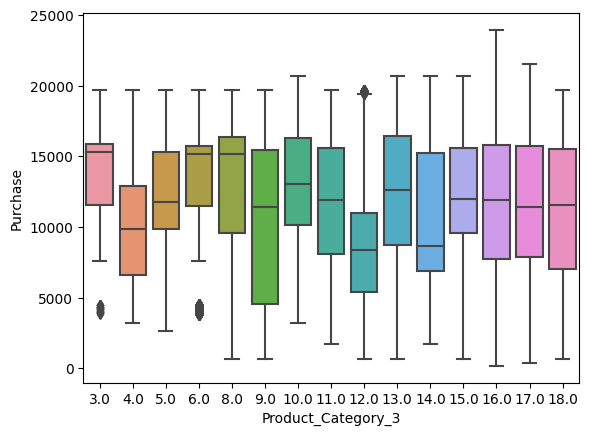

In [44]:
sns.boxplot(x=df_train['Product_Category_3'],y=df_train['Purchase'])

# Feature Engineering
## Handling Missing Values
## Handling Categorical features

In [45]:
print('Missing values of train set: ',df_train.isnull().mean()*100)

Missing values of train set:  Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64


In [46]:
print('Missing values of test set: ',df_test.isnull().mean()*100)

Missing values of test set:  Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64


<Axes: >

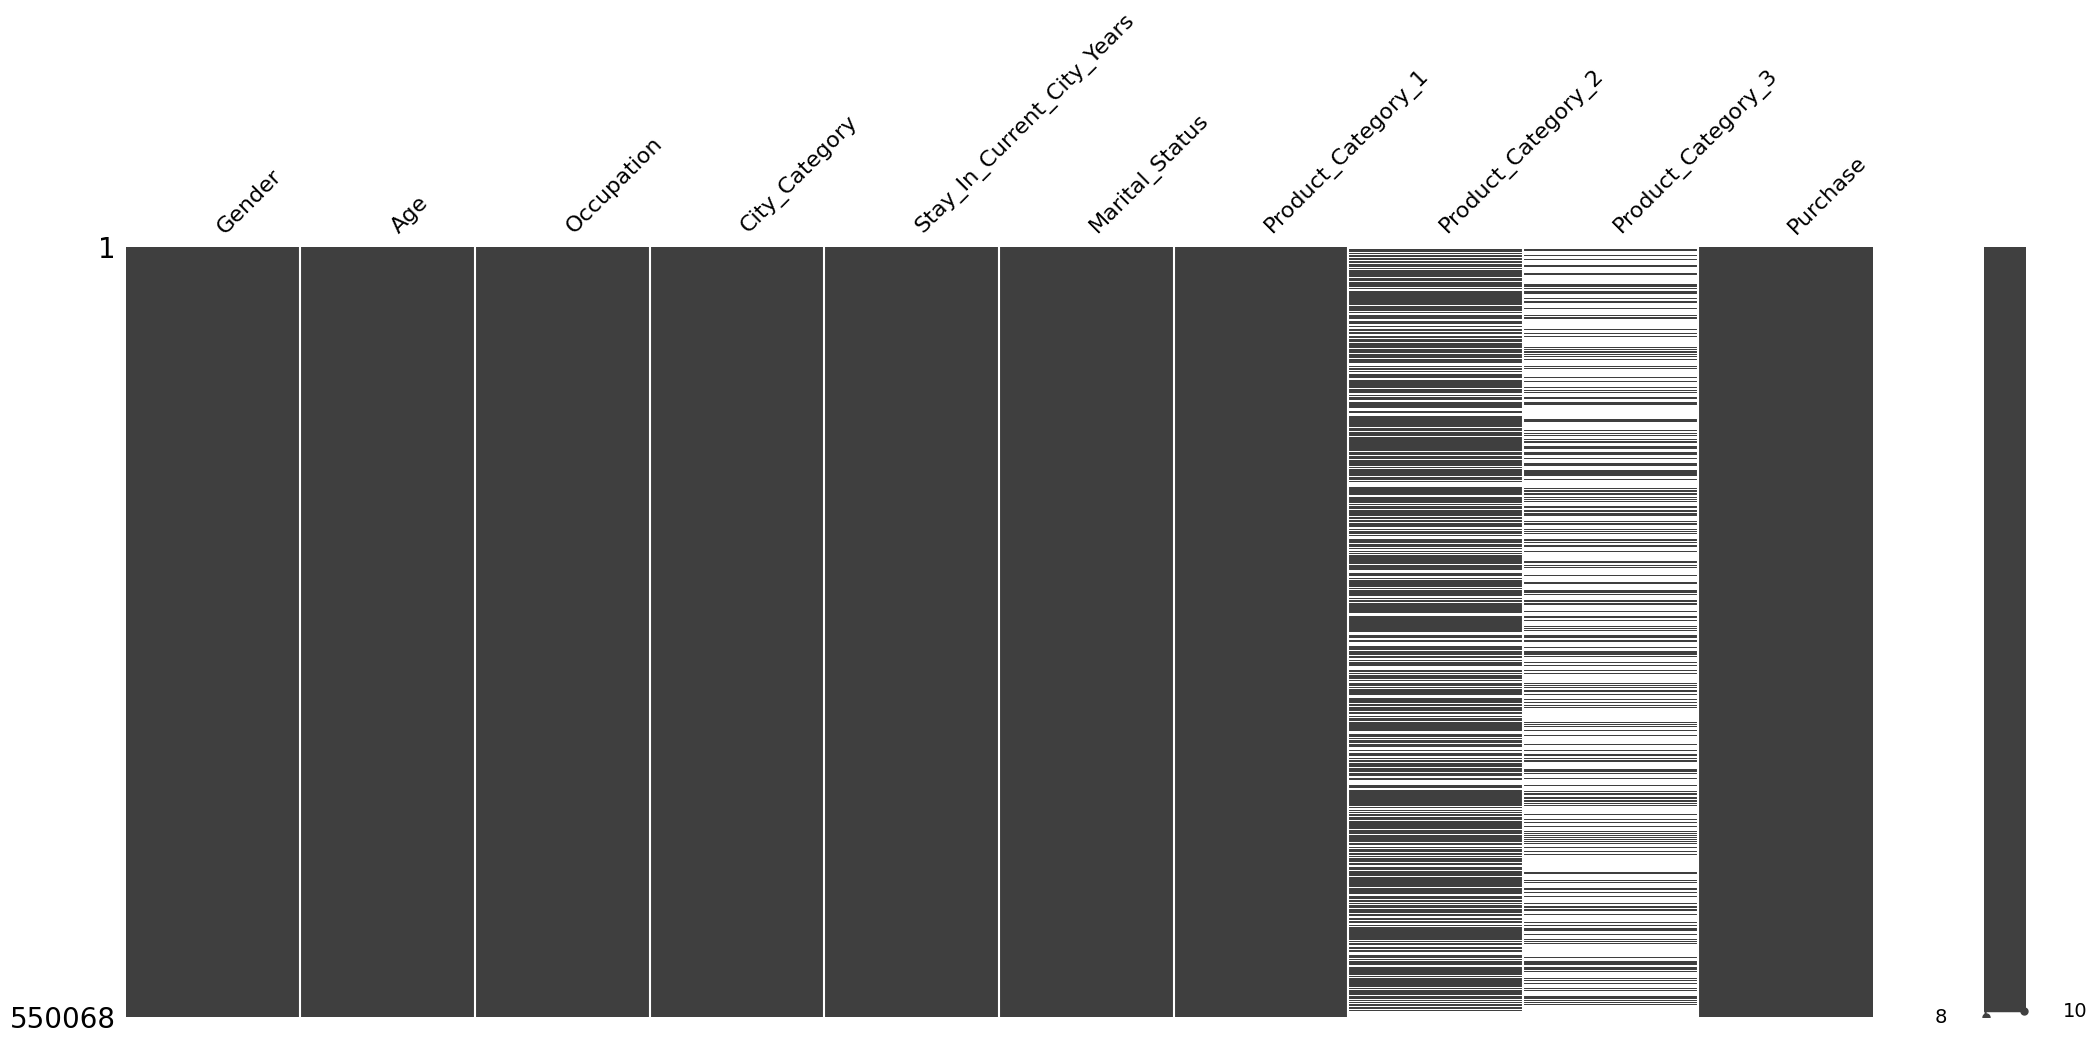

In [47]:
## for visualization
msno.matrix(df_train)

<Axes: >

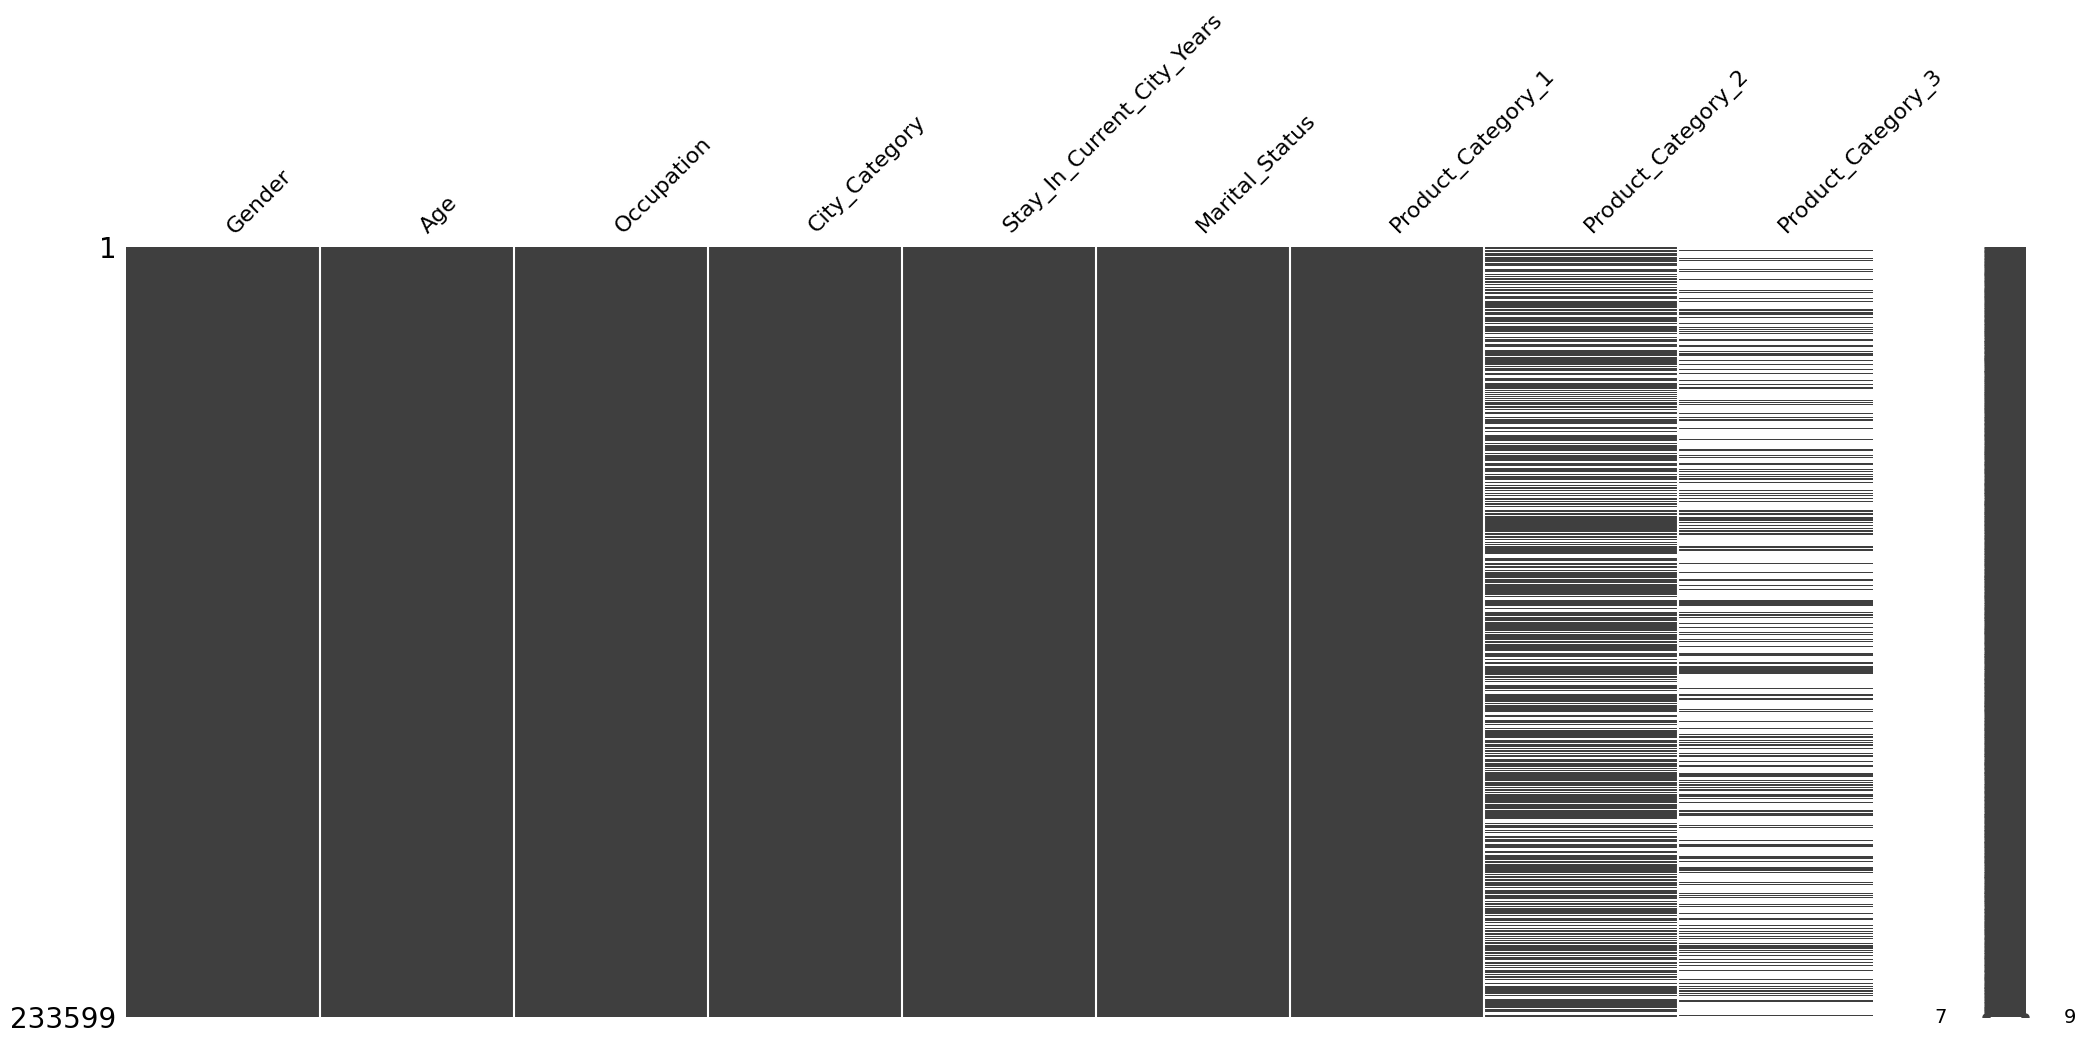

In [48]:
msno.matrix(df_test)

we observe that huge number of data are missing in product_category_3,we will drop that column

In [49]:
df_train=df_train.drop('Product_Category_3',axis=1)
df_test=df_test.drop('Product_Category_3',axis=1)

In [50]:
## Imputing missing values with mode
print('Unique values: ',df_train['Product_Category_2'].unique())
df_train['Product_Category_2'].mode()[0]
df_train['Product_Category_2']=df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mode()[0])
df_train.isnull().sum()

Unique values:  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [51]:
print('Unique values: ',df_test['Product_Category_2'].unique())
df_test['Product_Category_2'].mode()[0]
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mode()[0])
df_test.isnull().sum()

Unique values:  [11.  5. 14.  9.  3.  4. 13.  2. nan  8. 15. 17. 12. 16.  6. 10. 18.  7.]


Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [52]:
df_train['Gender']=df_train['Gender'].map({'F':0,'M':1}) #categorical to integer

In [53]:
df_test['Gender']=df_test['Gender'].map({'F':0,'M':1}) #categorical to integer

In [54]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df_train[col] = le.fit_transform(df_train[col])
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,8.0,8370
1,0,0,10,0,2,0,1,6.0,15200
2,0,0,10,0,2,0,12,8.0,1422
3,0,0,10,0,2,0,12,14.0,1057
4,1,6,16,2,4,0,8,8.0,7969


In [55]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df_test[col] = le.fit_transform(df_test[col])
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1,4,7,1,2,1,1,11.0
1,1,2,17,2,0,0,3,5.0
2,0,3,1,1,4,1,5,14.0
3,0,3,1,1,4,1,4,9.0
4,0,2,1,2,1,0,4,5.0


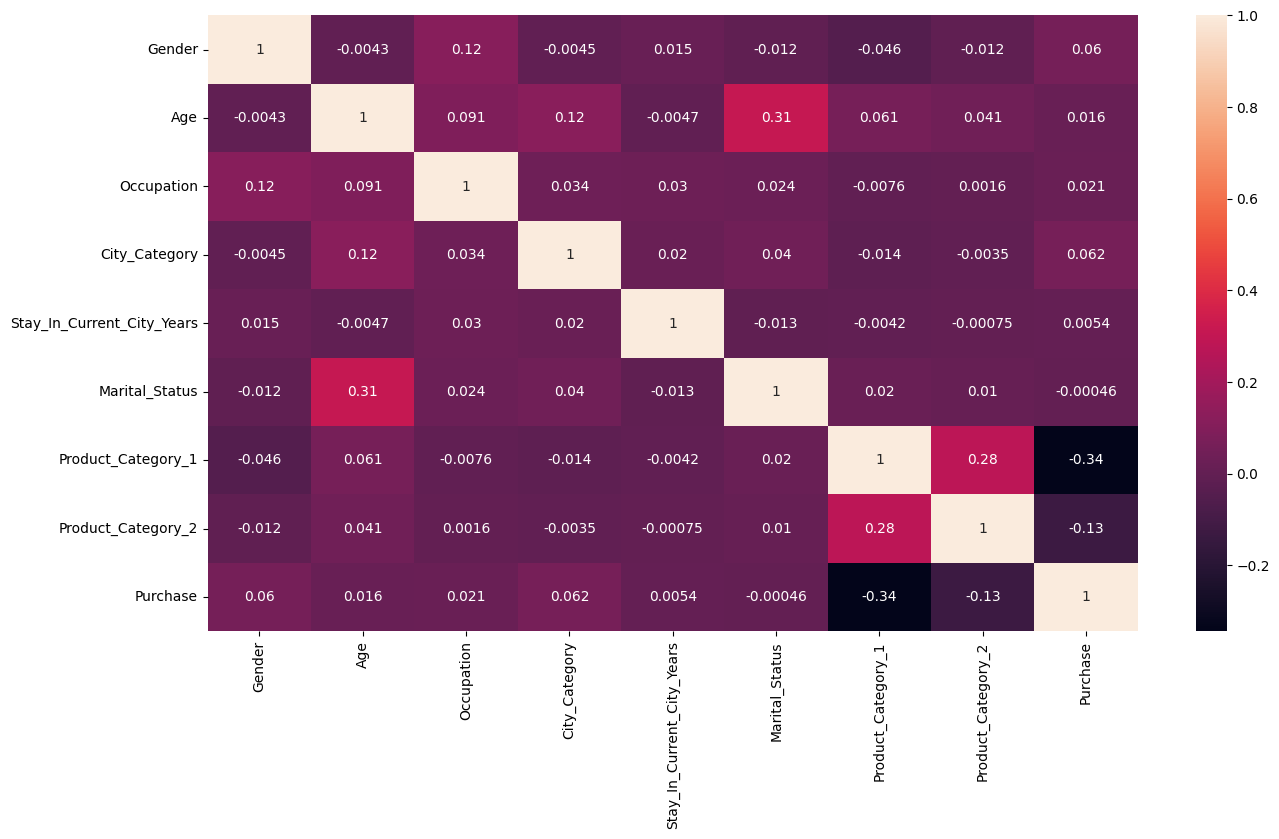

In [56]:
## Checking Correlation
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [57]:
## Splitting Train and Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_train,df_train['Purchase'],test_size=0.25,random_state=0)

In [58]:
x_train.shape,y_train.shape

((412551, 9), (412551,))

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [60]:
transformer=ColumnTransformer(transformers=[
    ("tnf1",OneHotEncoder(sparse=False,drop="first"),["Age","Gender","City_Category","Product_Category_1","Product_Category_2"])

],remainder="passthrough")

In [61]:
transformer.fit_transform(x_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.2119e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.5764e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.0000e+00, 1.0000e+00,
        8.8990e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        6.9910e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.3251e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        9.9050e+03]])

In [62]:
transformer.transform(x_test)

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 0.0000e+00,
        1.5228e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0880e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        1.6426e+04],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.5817e+04],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        6.1910e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.8540e+03]])

In [63]:
import numpy as np
features=['Age','Gender','City_Category','Product_Category_1','Product_Category_2']

for feature in features:
    labels_ordered=df_train.groupby([feature])['Purchase'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_train[feature]=df_train[feature].map(labels_ordered)


In [64]:
df_train=df_train[df_train.Product_Category_1 > 2.5]
df_train.reset_index(drop=True,inplace=True)

# **Feature Scaling**

In [65]:
feature_scale=[feature for feature in df_train.columns if feature not in ["Purchase","Stay_In_Current_City_Years","Age"]]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_train[feature_scale])

MinMaxScaler()

# **Feature Selection**

In [66]:
##for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [67]:
## Splitting Train and Test data
x_train=df_train.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
y_train=df_train['Purchase']

In [68]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.1, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.1, random_state=0))

In [69]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 7
selected features: 7
features with coefficients shrank to zero: 0


In [70]:
x_train=x_train[selected_feat]

# **Observation**

/tmp/ipykernel_19/2820157967.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


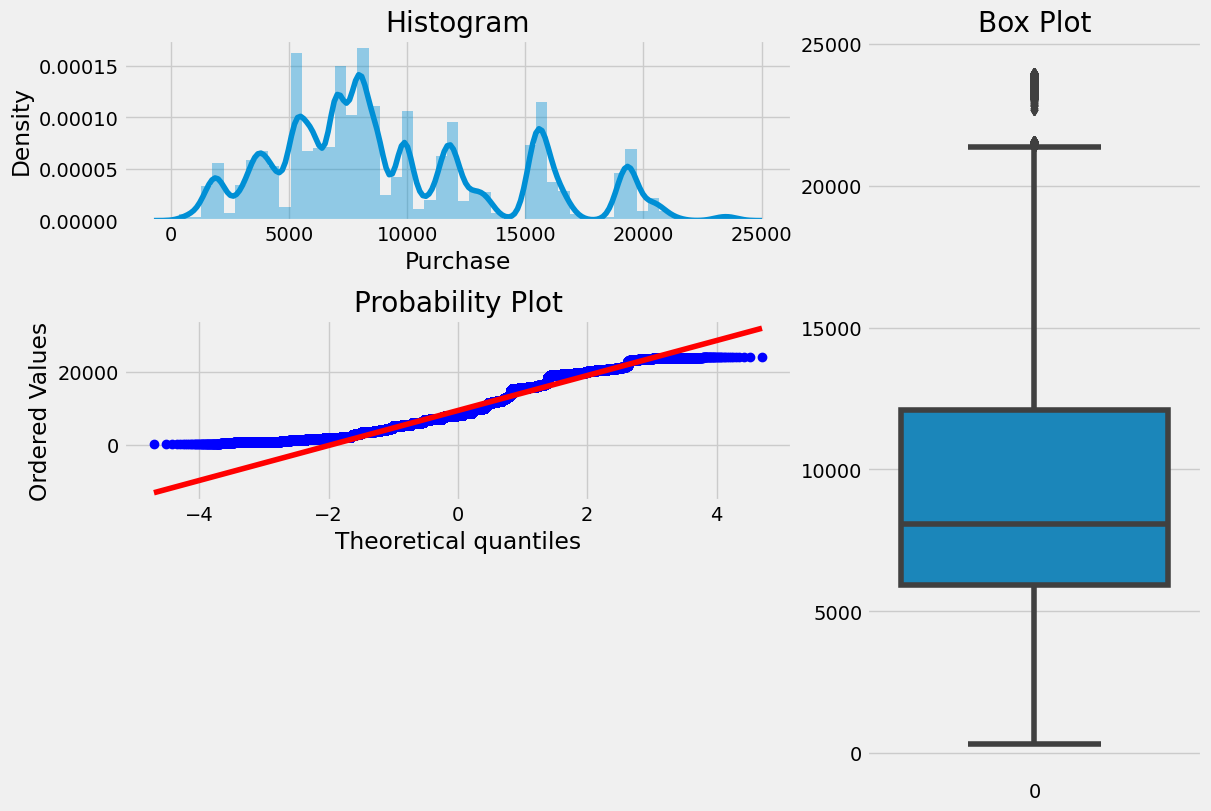

In [71]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules.
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title.
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot.
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    ## Plotting the box plot.
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

plotting_3_chart(df_train, 'Purchase')

In [72]:
df_train["Purchase"].skew()

0.6521510615863566

In [73]:
df_train["Purchase"].kurt()

-0.3439310670410465

In [74]:
(df_train.corr()**2)["Purchase"].sort_values(ascending=False)[1:]

Product_Category_1            6.008448e-01
Product_Category_2            1.296969e-01
City_Category                 4.798063e-03
Gender                        3.694642e-03
Age                           5.570585e-04
Occupation                    4.891357e-04
Stay_In_Current_City_Years    2.584327e-05
Marital_Status                2.080387e-07
Name: Purchase, dtype: float64

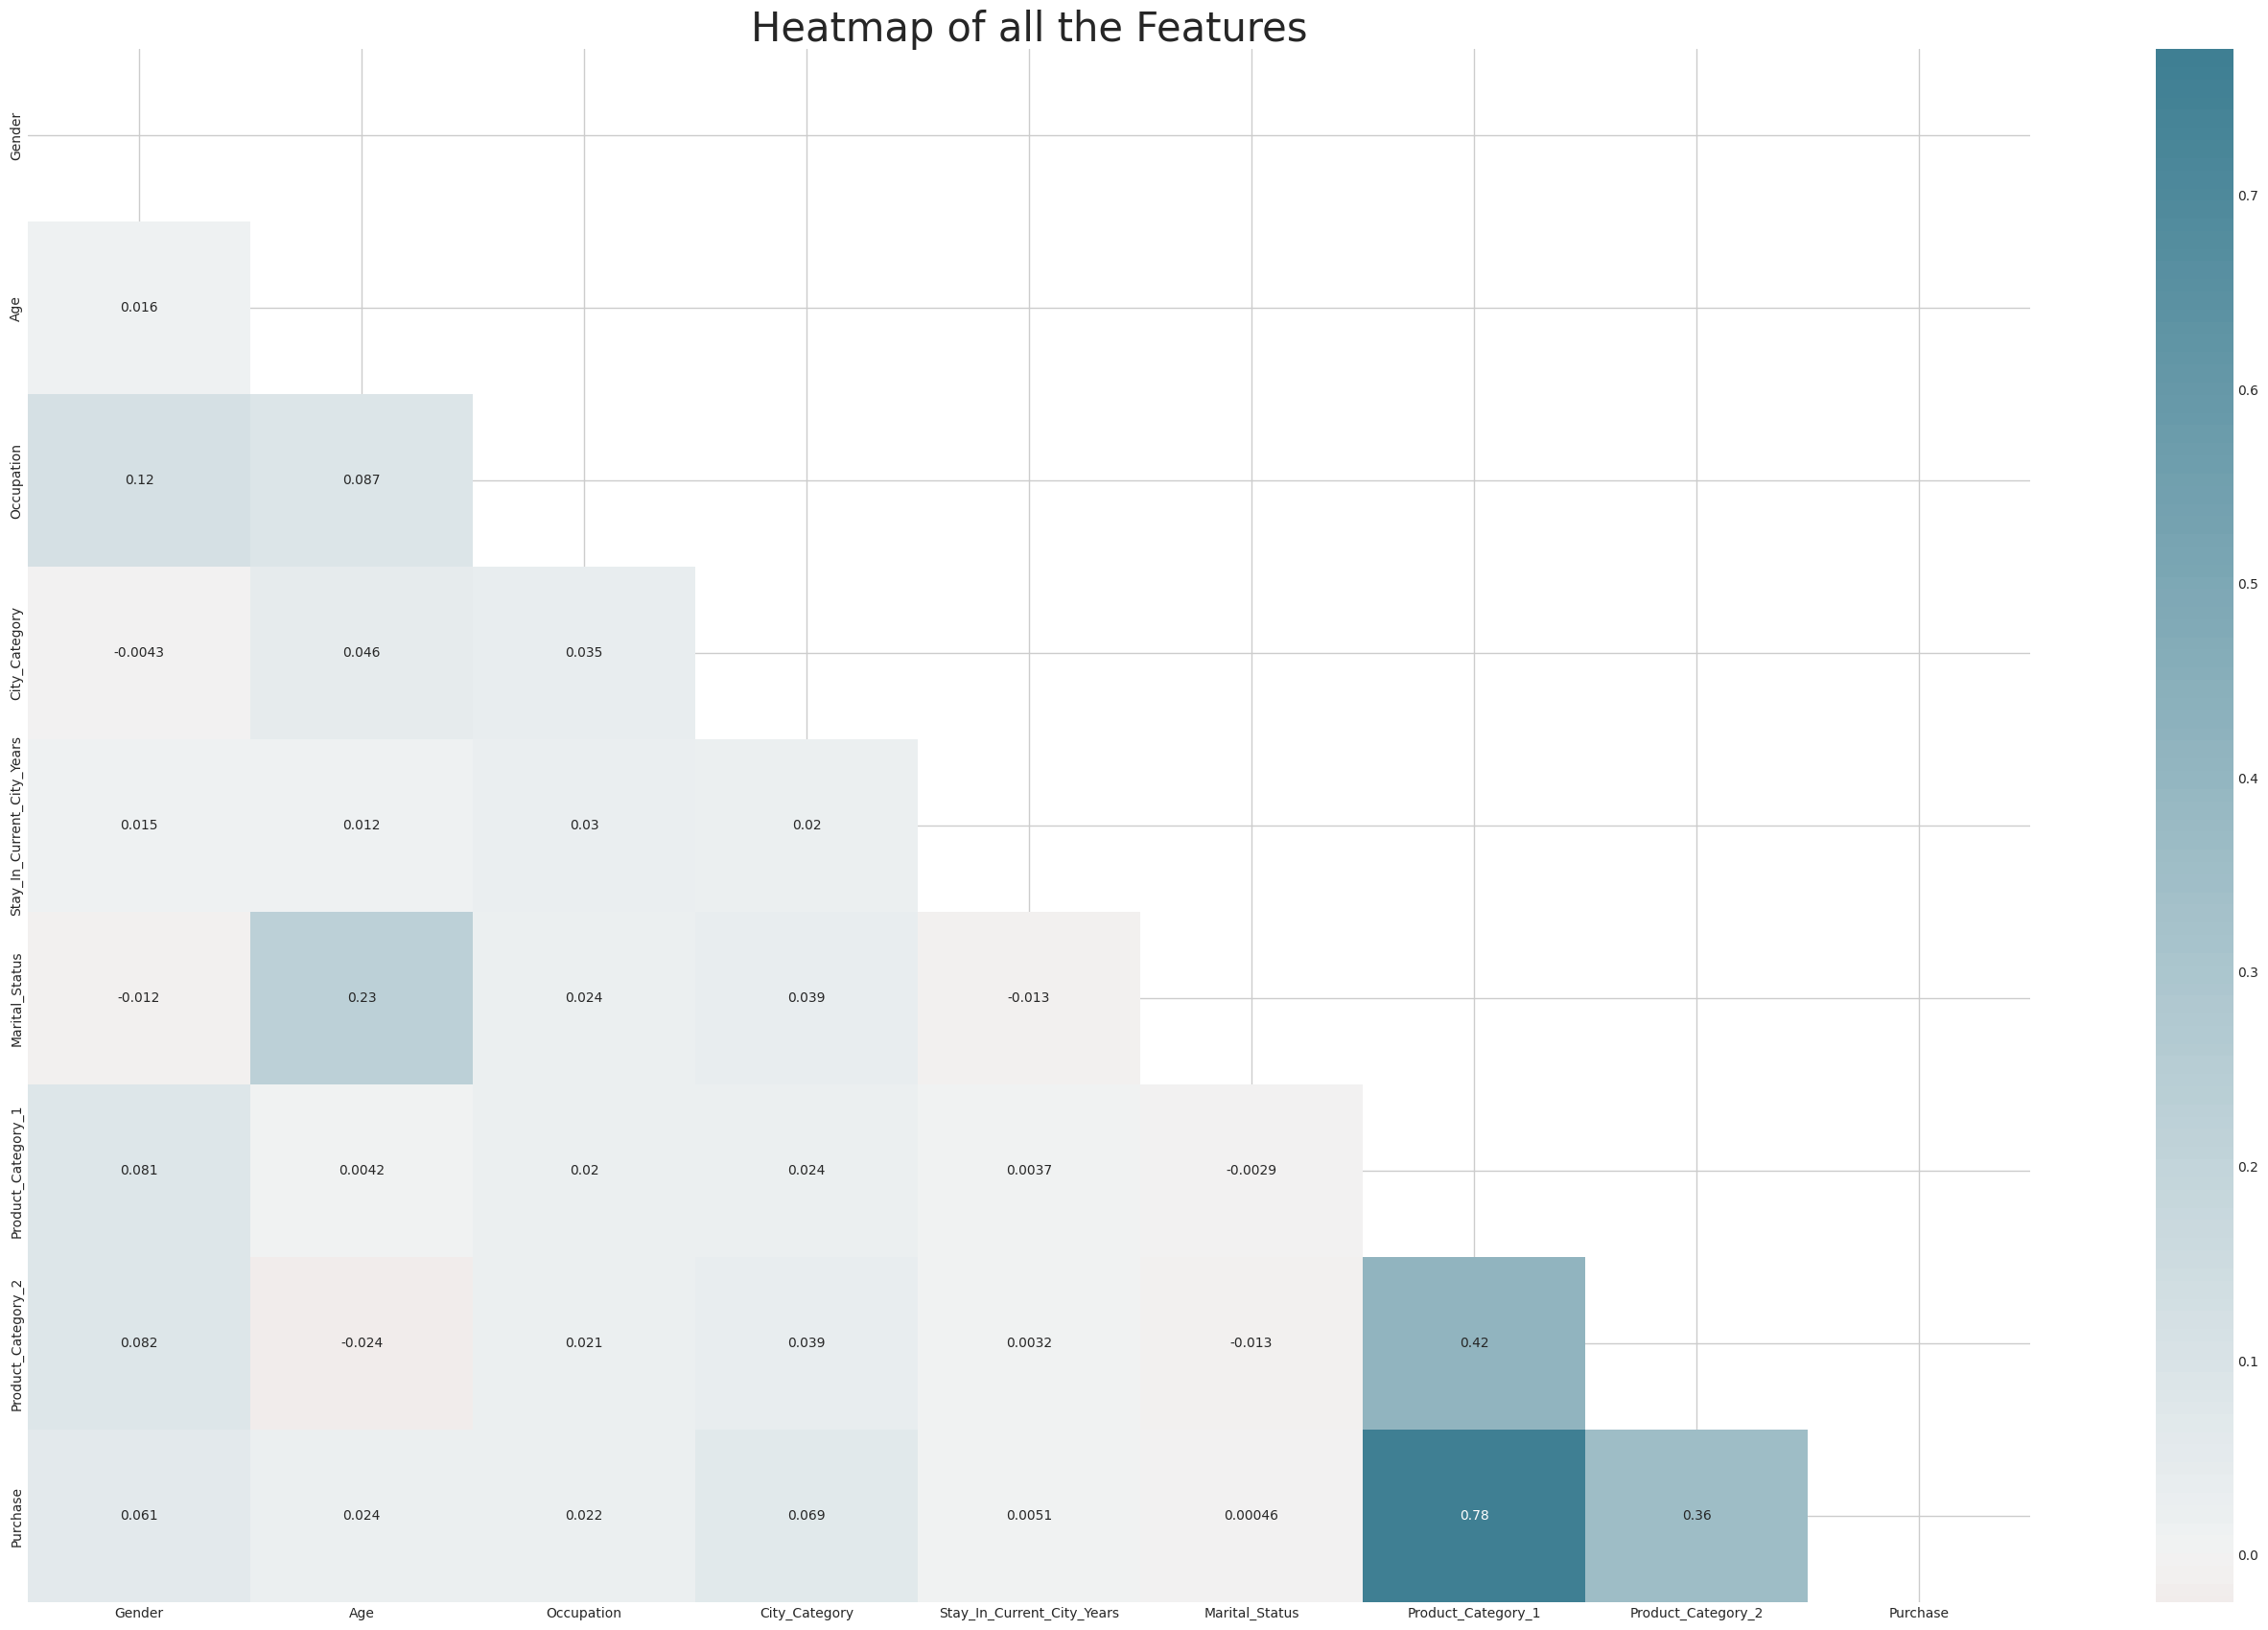

In [75]:
## Plot fig sizing.
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap.

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df_train.corr(),
            cmap=sns.diverging_palette(20, 220, n=200),
            mask = mask,
            annot=True,
            center = 0,
           );
## Give title.
plt.title("Heatmap of all the Features", fontsize = 30);

In [76]:
def customized_scatterplot(y, x):
        ## Sizing the plot.
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

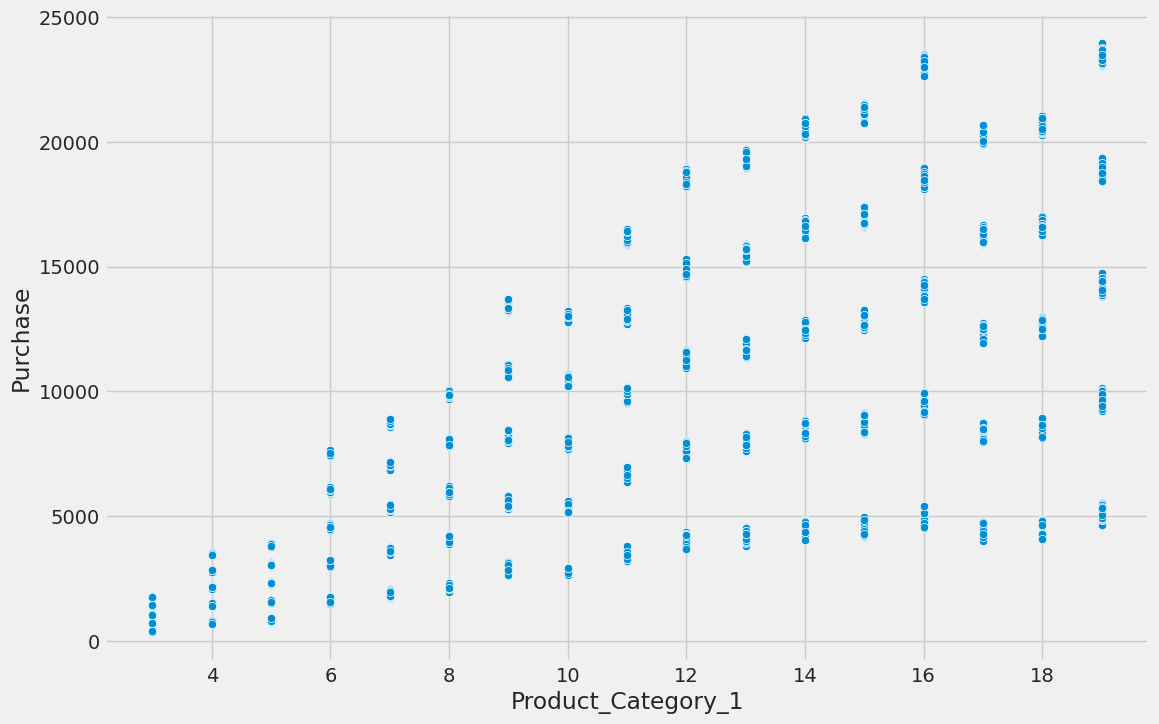

In [77]:
customized_scatterplot(df_train.Purchase,df_train.Product_Category_1)

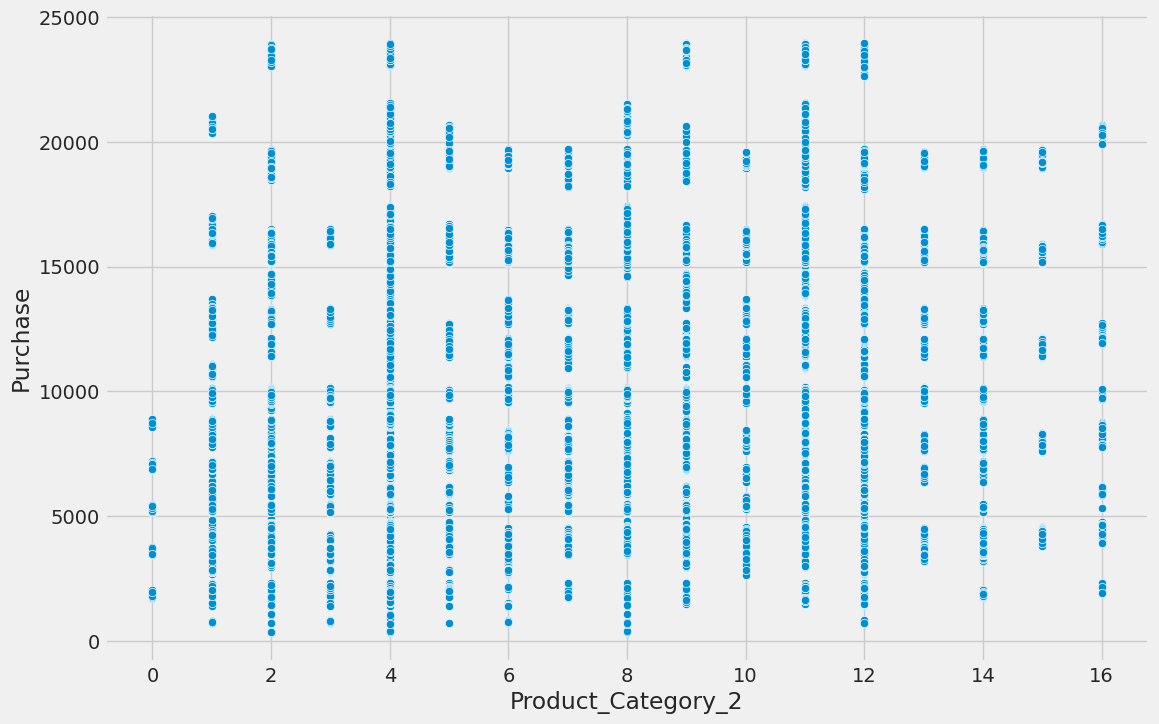

In [78]:
customized_scatterplot(df_train.Purchase,df_train.Product_Category_2)

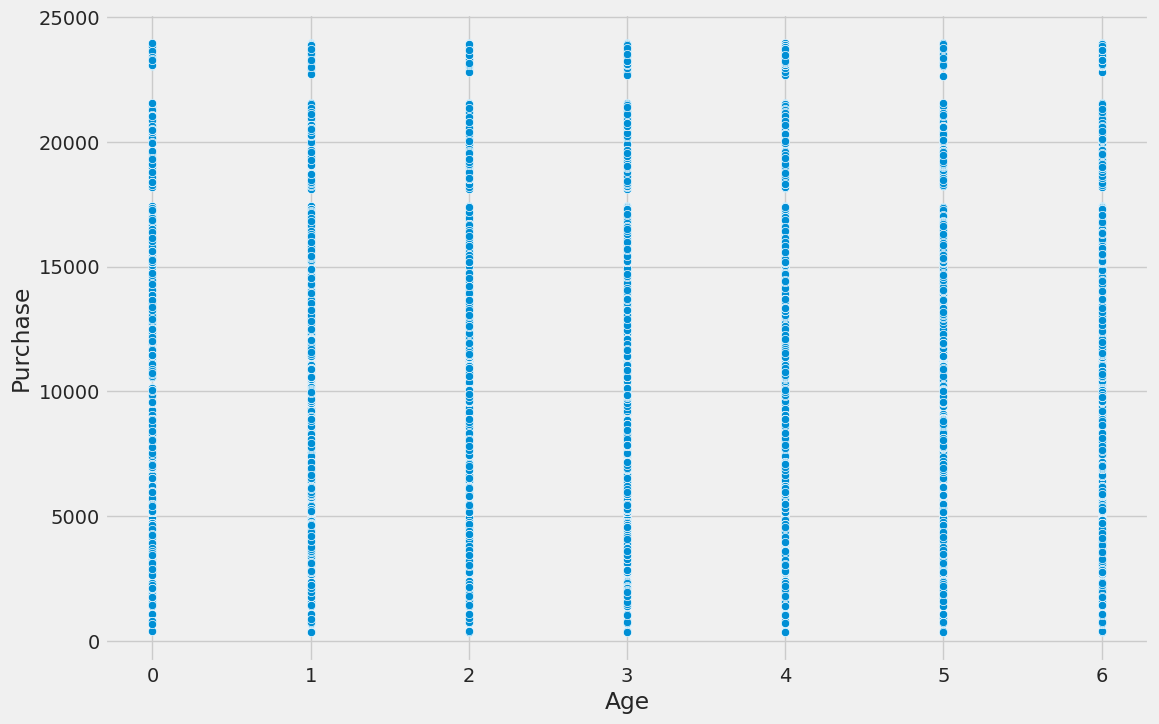

In [79]:
customized_scatterplot(df_train.Purchase,df_train.Age)

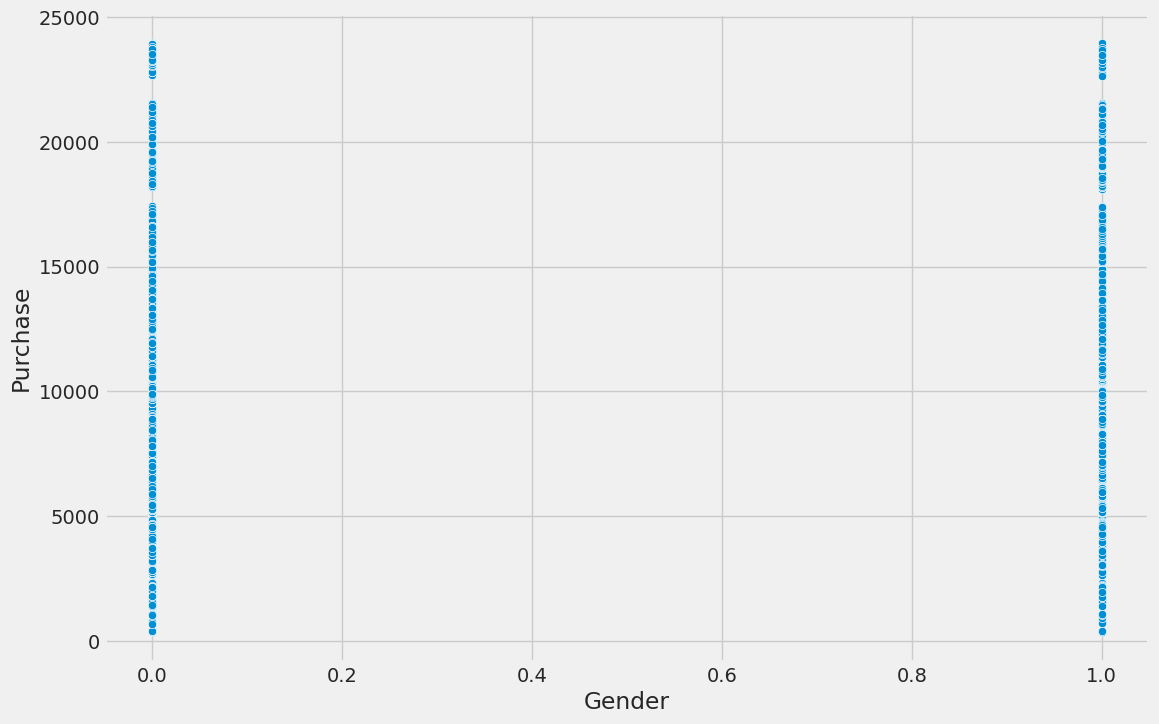

In [80]:
customized_scatterplot(df_train.Purchase,df_train.Gender)

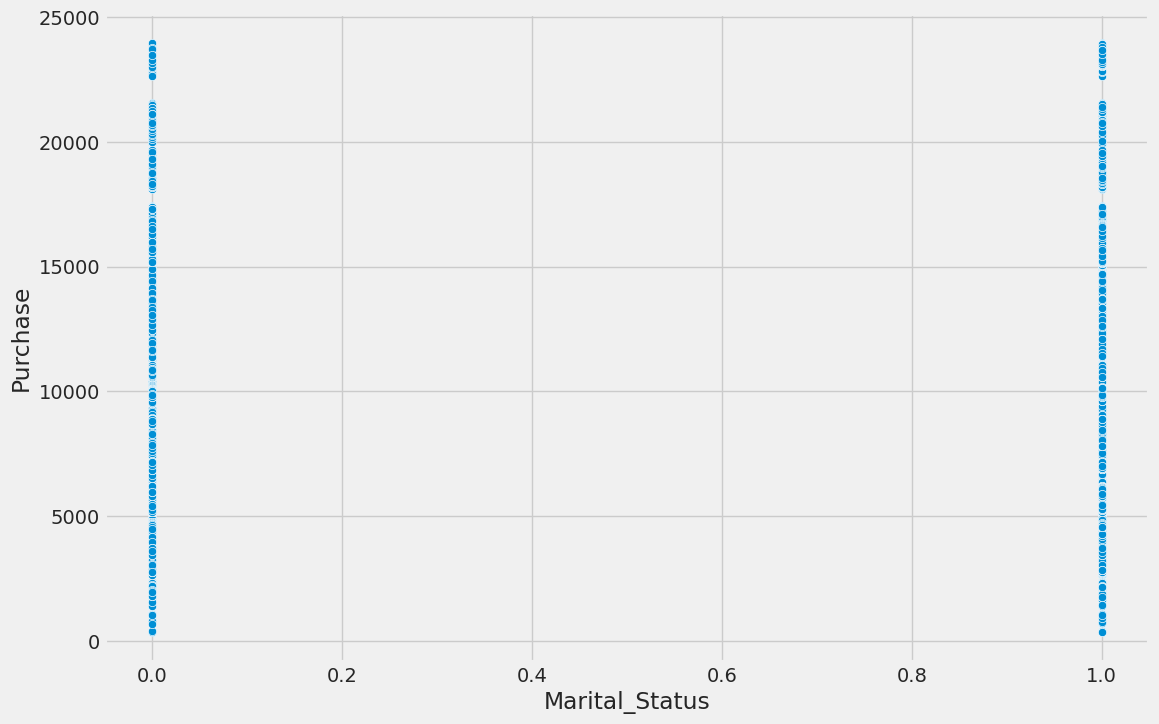

In [81]:
customized_scatterplot(df_train.Purchase,df_train.Marital_Status)

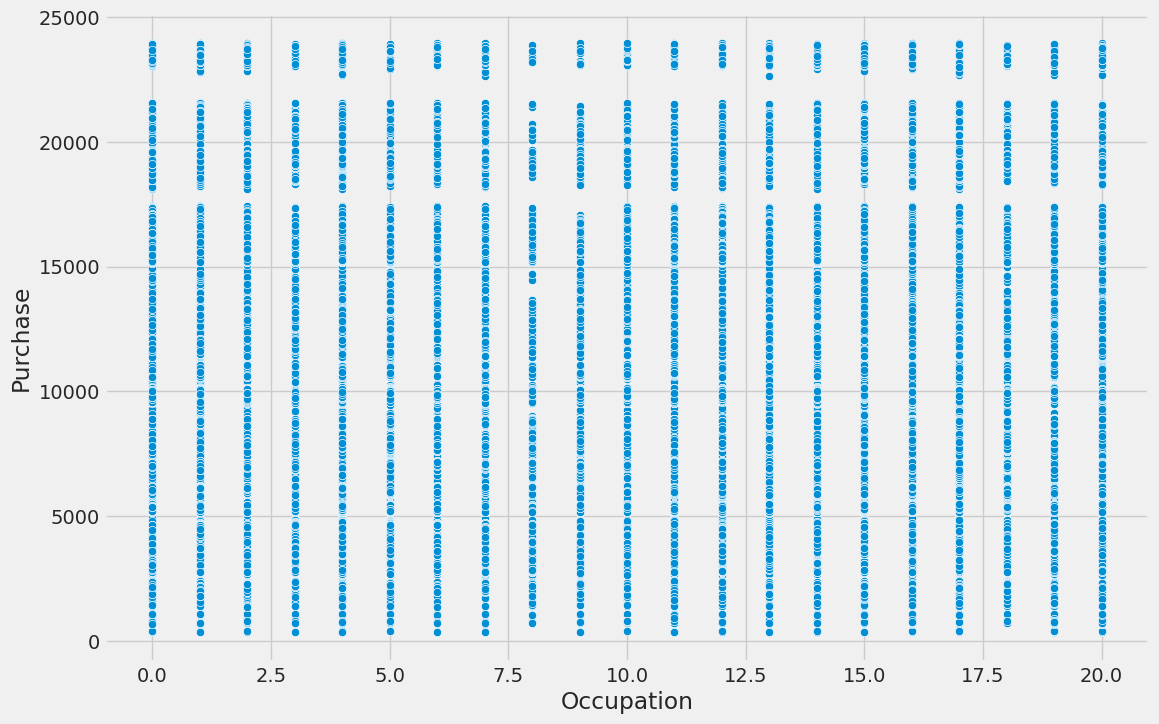

In [82]:
customized_scatterplot(df_train.Purchase,df_train.Occupation)

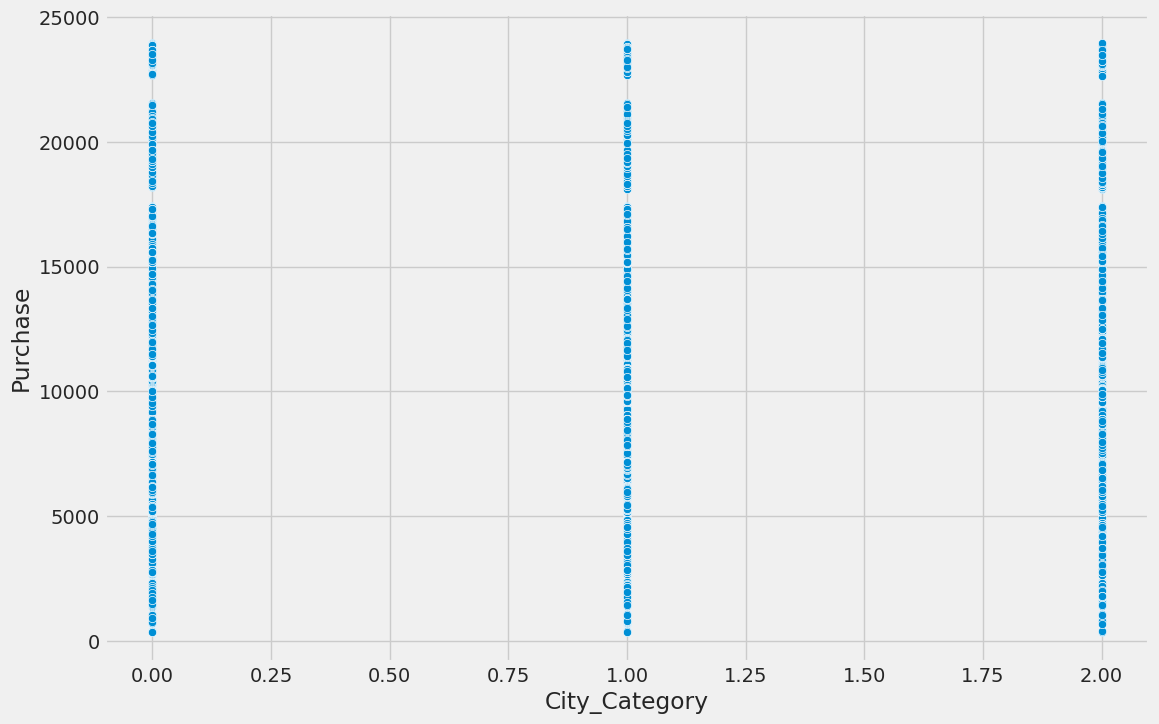

In [83]:
customized_scatterplot(df_train.Purchase,df_train.City_Category)

# **Assumptions**

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

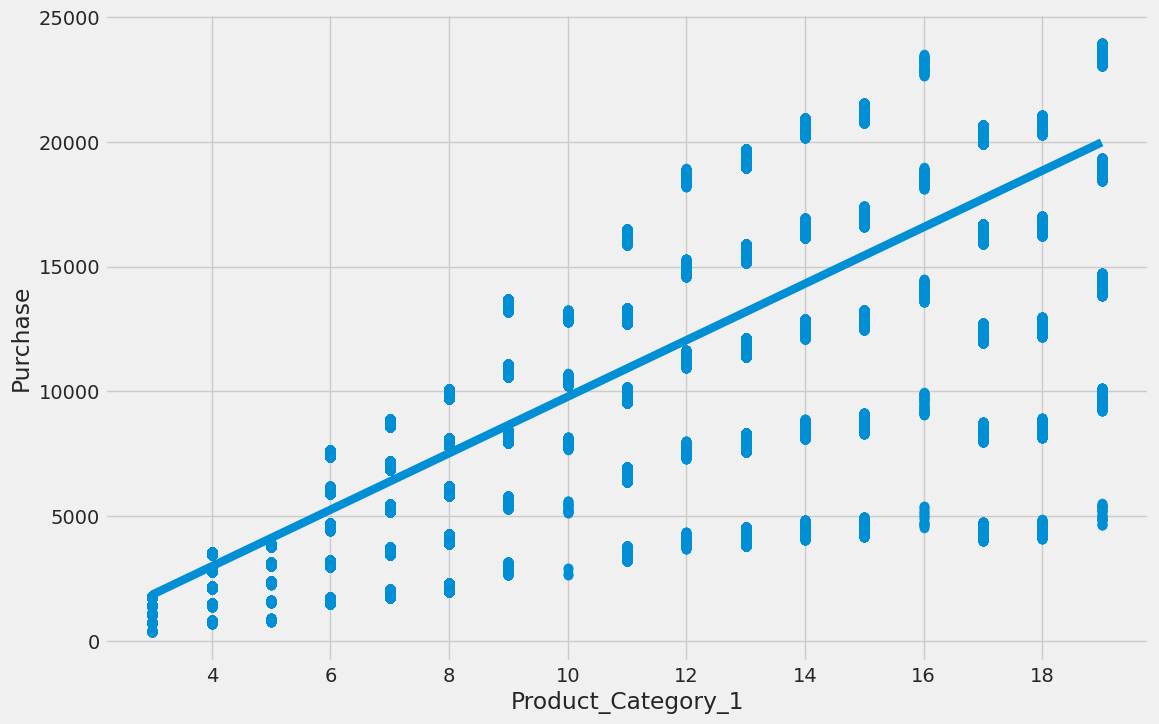

In [84]:
## Plot sizing.
fig, (ax1) = plt.subplots(figsize = (12,8), ncols=1,sharey=True)

sns.scatterplot(x=df_train.Product_Category_1, y = df_train.Purchase,  ax=ax1)
## Putting a regression line.
sns.regplot(x=df_train.Product_Category_1, y = df_train.Purchase, ax=ax1)

/tmp/ipykernel_19/2820157967.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


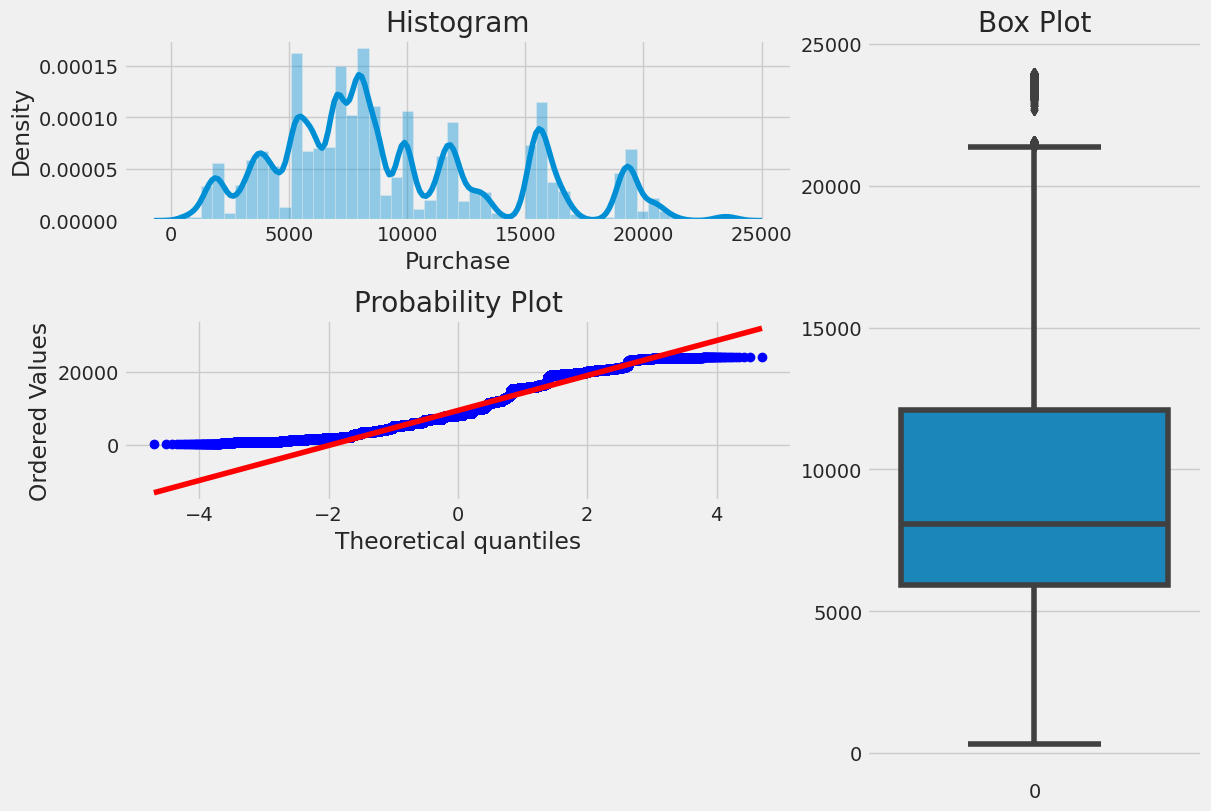

In [85]:
plotting_3_chart(df_train,"Purchase")

/tmp/ipykernel_19/2820157967.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


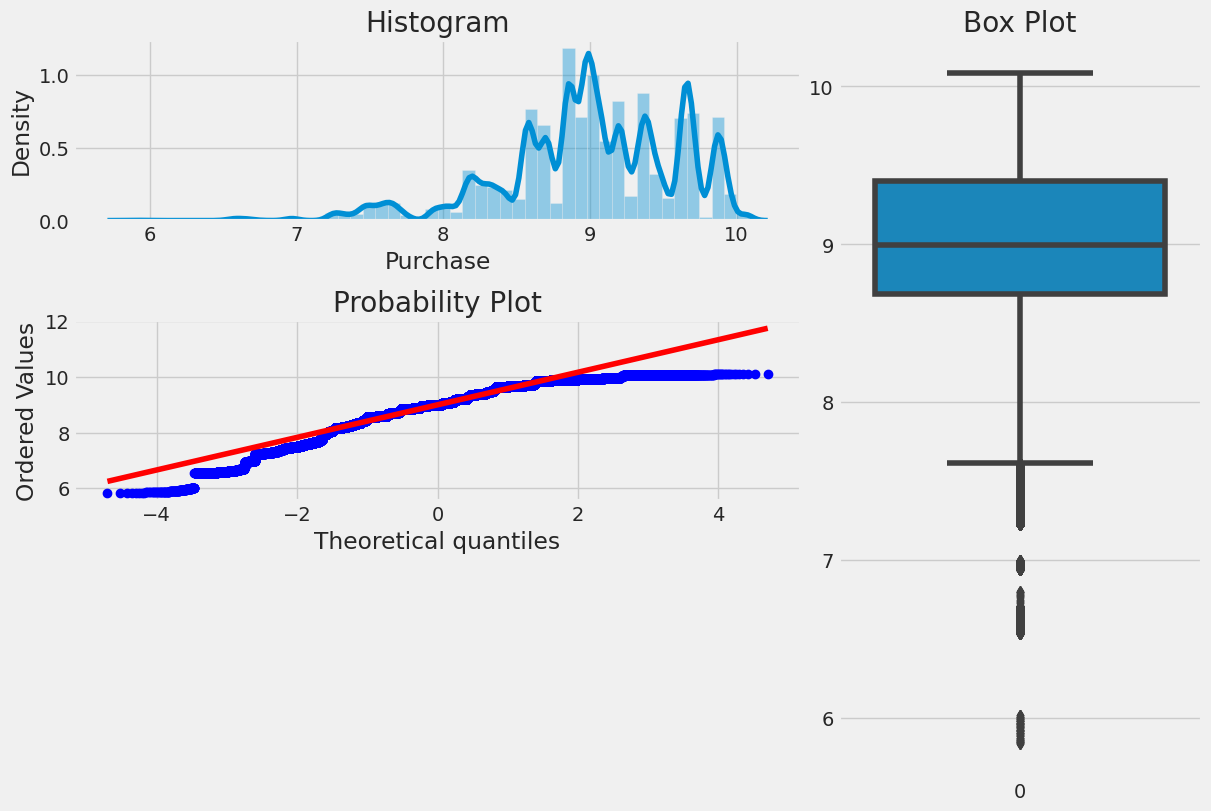

In [86]:
df_train["Purchase"]=np.log1p(df_train["Purchase"])
plotting_3_chart(df_train,"Purchase")

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

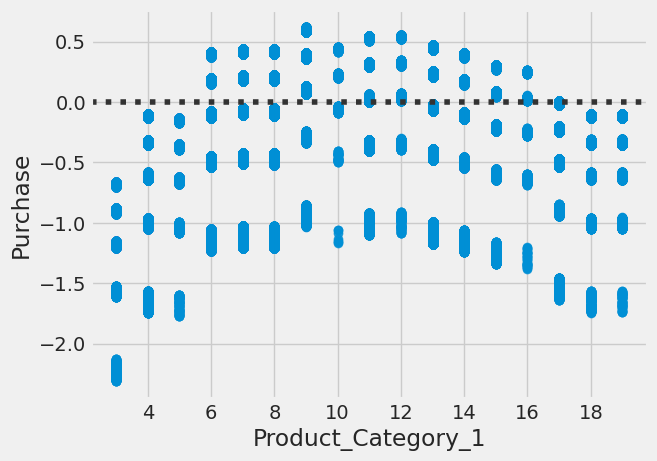

In [87]:
sns.residplot(x = df_train.Product_Category_1, y = df_train.Purchase)

In [88]:
## Deleting those two values with outliers.
train = df_train[df_train.Product_Category_1 < 4500]
train.reset_index(drop = True, inplace = True)

## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

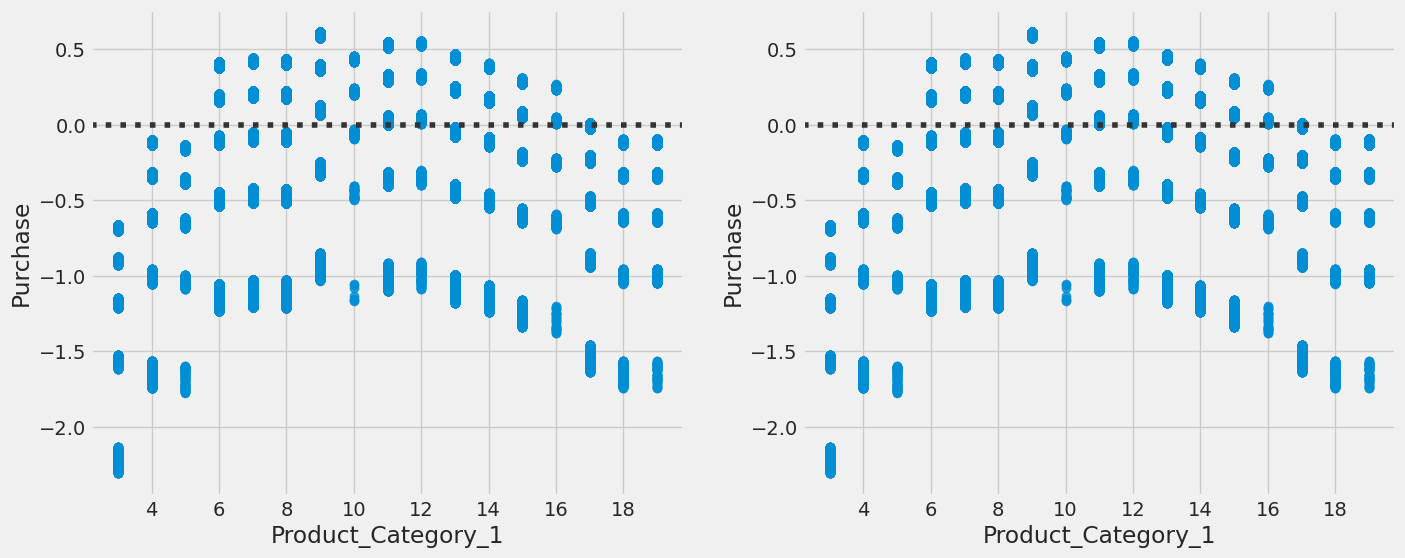

In [89]:
fig, (ax1, ax2) = plt.subplots(figsize = (15,6),
                               ncols=2,
                               sharey = False,
                               sharex=False
                              )
## doing the first scatter plot.
sns.residplot(x = previous_train.Product_Category_1, y = previous_train.Purchase, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice.
sns.residplot(x = df_train.Product_Category_1, y = df_train.Purchase, ax = ax2);

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('Purchase',axis=1),df_train['Purchase'],test_size =0.25, random_state = 0)

In [91]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((405274, 8), (405274,), (135092, 8), (135092,))

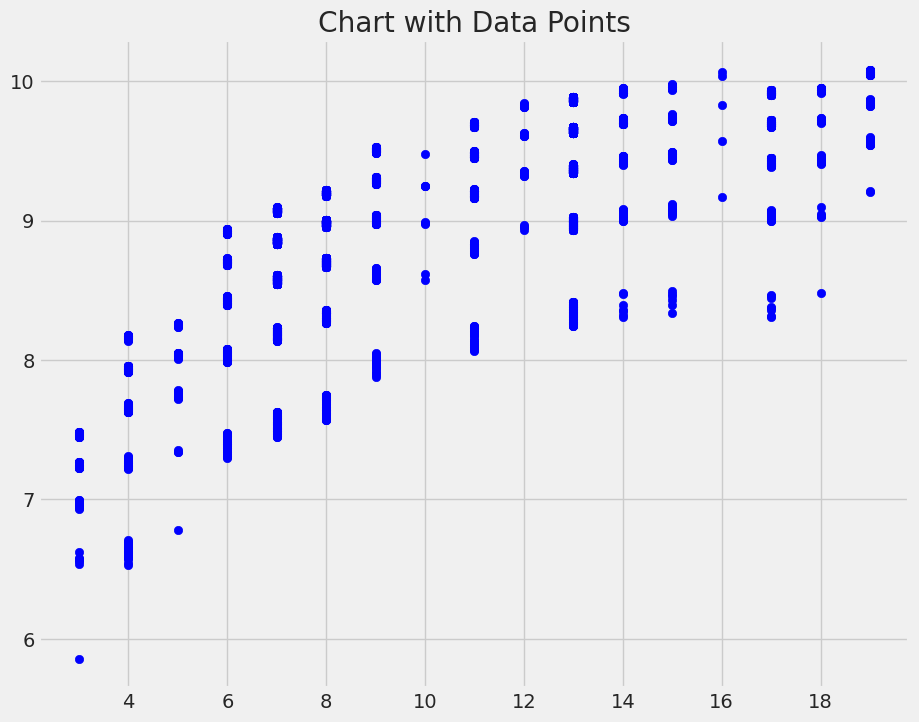

In [92]:
sample_train = df_train.sample(10000)
import seaborn as sns
plt.subplots(figsize = (10,8))
ax = plt.gca()
ax.scatter(sample_train.Product_Category_1.values, sample_train.Purchase.values, color ='b');
plt.title("Chart with Data Points");

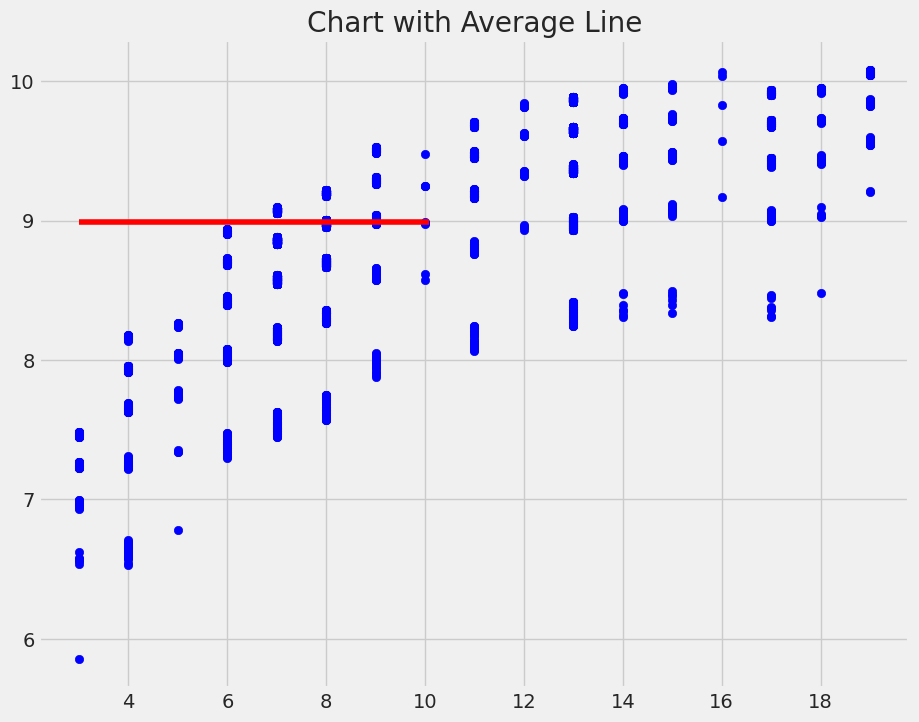

In [93]:
plt.subplots(figsize = (10,8))
ax = plt.gca()
ax.scatter(sample_train.Product_Category_1.values, sample_train.Purchase.values, color ='b');
ax.plot((sample_train.Product_Category_1.values.min(),sample_train.Purchase.values.max()), (sample_train.Purchase.values.mean(),sample_train.Purchase.values.mean()), color = 'r');
plt.title("Chart with Average Line");

In [94]:
## Calculating Mean Squared Error(MSE)
sample_train['mean_Purchase'] = sample_train.Purchase.mean()
sample_train['mse'] = np.square(sample_train.mean_Purchase - sample_train.Purchase)
sample_train.mse.mean()
## getting mse
print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

Mean Squared Error(MSE) for average line is : 0.3549464435380152


In [95]:
## Calculating the beta coefficients by hand.
## mean of y.
y_bar = sample_train.Purchase.mean()
## mean of x.
x_bar = sample_train.Product_Category_1.mean() ## Calculating the beta coefficients by hand.
## mean of y.
y_bar = sample_train.Purchase.mean()
## mean of x.
x_bar = sample_train.Product_Category_1.mean()
## Std of y
std_y = sample_train.Purchase.std()
## std of x
std_x = sample_train.Product_Category_1.std()
## correlation of x and y
r_xy = sample_train.corr().loc['Product_Category_1','Purchase']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar.mean()
## Std of y
std_y = sample_train.Purchase.std()
## std of x
std_x = sample_train.Product_Category_1.std()
## correlation of x and y
r_xy = sample_train.corr().loc['Product_Category_1','Purchase']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar

In [96]:
## getting y_hat, which is the predicted y values.
sample_train['Linear_Yhat'] = beta_0 + beta_1*sample_train['Product_Category_1']

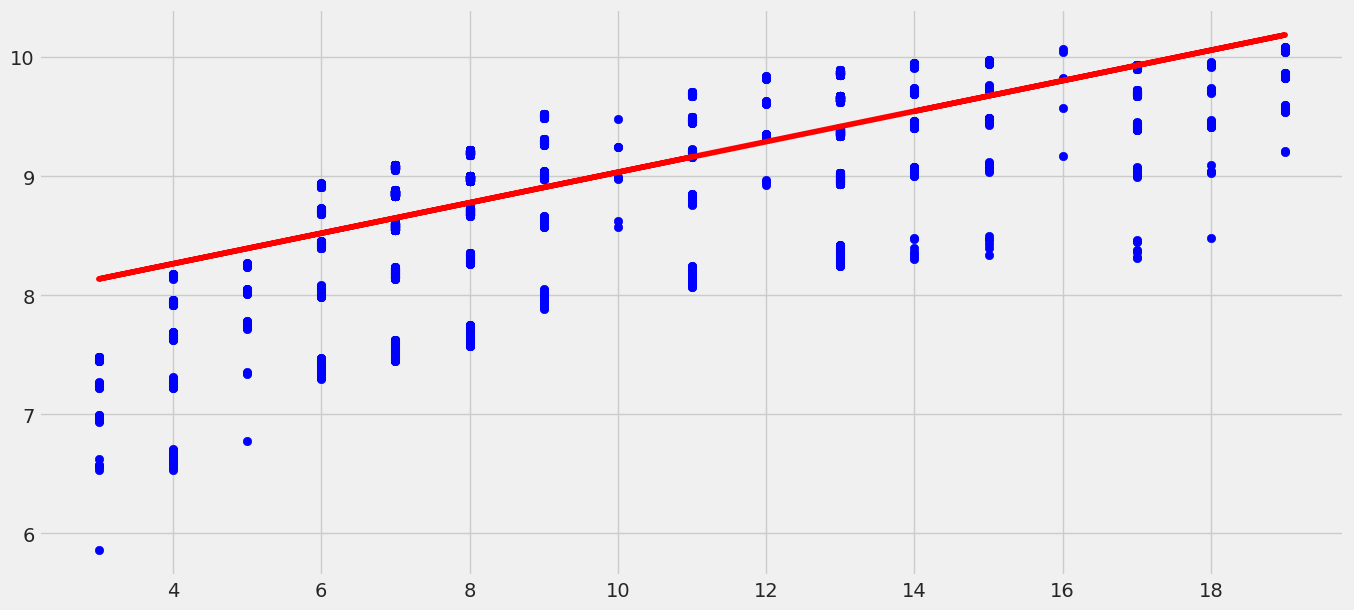

In [97]:
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(sample_train.Product_Category_1, sample_train.Purchase, c='b')
ax.plot(sample_train['Product_Category_1'], sample_train['Linear_Yhat'], color='r');

In [98]:
print("Mean Squared Error(MSE) for regression line is : {}".format(np.square(sample_train['Purchase'] - sample_train['Linear_Yhat']).mean()))

Mean Squared Error(MSE) for regression line is : 0.16992616126882026


In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sample_train['Purchase'], sample_train.Linear_Yhat)

0.16992616126882026

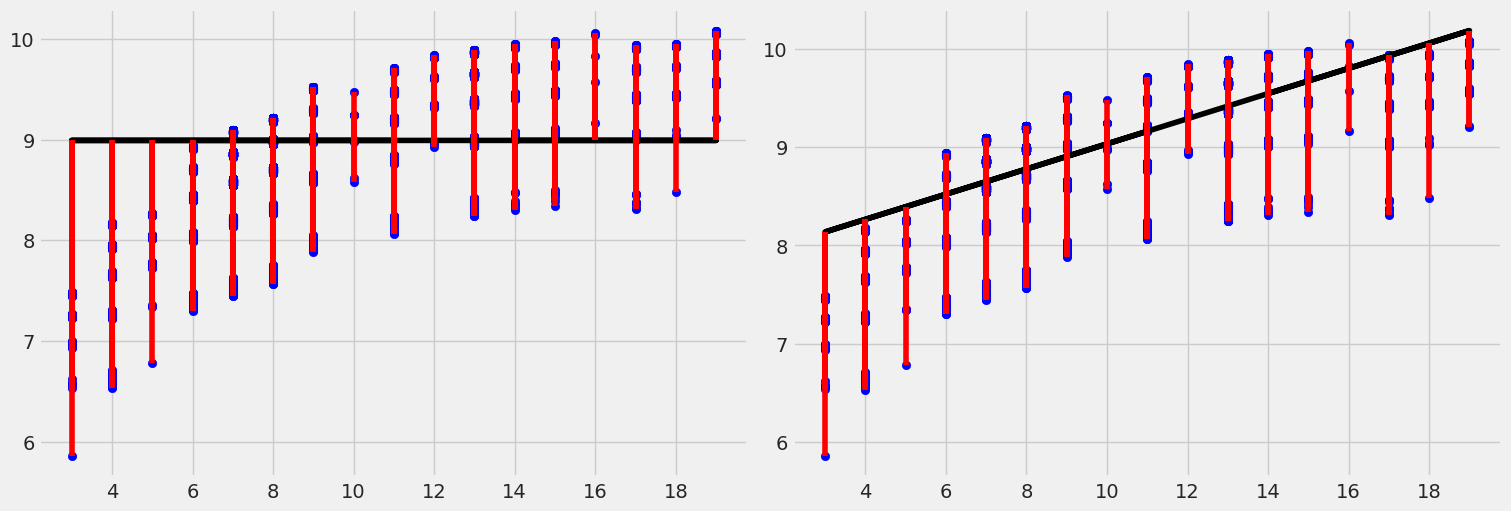

In [100]:
## Creating a customized chart. and giving in figsize and everything.
fig = plt.figure(constrained_layout=True, figsize=(15,5))
## creating a grid of 3 cols and 3 rows.
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['Product_Category_1'], y=sample_train['Purchase'], c='b')
ax1.plot(sample_train['Product_Category_1'], sample_train['mean_Purchase'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['Product_Category_1'], row['Product_Category_1']), (row['Purchase'], row['mean_Purchase']), 'r-')

ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['Product_Category_1'], y=sample_train['Purchase'], c='b')
ax2.plot(sample_train['Product_Category_1'], sample_train['Linear_Yhat'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['Product_Category_1'], row['Product_Category_1']), (row['Purchase'], row['Linear_Yhat']), 'r-')

In [101]:
## Splitting Train and Test data
X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(n_jobs=-1)
## fit train and test data. 
lin_reg.fit(x_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(x_test)

In [102]:
## get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

0.17


# **Modeling(LinearReg,RandomForestReg,XGBoostReg,DecisionTreeReg)**

In [103]:
X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Linear Regression**

In [105]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [106]:
lr.intercept_

7.699868867899665

In [107]:
lr.coef_

array([-1.33622780e-02,  1.09012919e-02,  2.24816498e-04,  3.62686351e-02,
        4.01875502e-05, -4.54385470e-03,  1.24645442e-01,  4.15495717e-03])

In [108]:
y_pred = lr.predict(X_test)

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print('MAE ',mean_absolute_error(y_test, y_pred))
print('MSE',mean_squared_error(y_test, y_pred))
print('R2 Score',r2_score(y_test, y_pred))
from math import sqrt
print("RMSE of Linear Regression Model ",sqrt(mean_squared_error(y_test, y_pred)))

MAE  0.31536545772921903
MSE 0.17209297305951163
R2 Score 0.5179150230817708
RMSE of Linear Regression Model  0.41484090089998554


## **DecisionTreeRegressor**

In [110]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)  

regressor.fit(X_train, y_train)



DecisionTreeRegressor(random_state=0)

In [111]:
dt_y_pred = regressor.predict(X_test)
print('MAE',mean_absolute_error(y_test, dt_y_pred))
print('MSE',mean_squared_error(y_test, dt_y_pred))
print('R2_Score',r2_score(y_test, dt_y_pred))
from math import sqrt
print("RMSE of DecisionTree Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

MAE 0.28744101723598187
MSE 0.1550315630949388
R2_Score 0.5657092431637217
RMSE of DecisionTree Regression Model is  0.39374047683079116


## **RandomForestRegressor**

In [112]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0)

RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [113]:
rf_y_pred = RFregressor.predict(X_test)
print('MAE',mean_absolute_error(y_test, rf_y_pred))
print('MSE',mean_squared_error(y_test, rf_y_pred))
print('R2_Score',r2_score(y_test, rf_y_pred))
from math import sqrt
print("RMSE of RandomForest Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

MAE 0.2795772197100655
MSE 0.14303157974476988
R2_Score 0.599324861474789
RMSE of RandomForest Regression Model is  0.37819516092193706


In [114]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
xgb_y_pred = xgb_reg.predict(X_test)
print('MAE',mean_absolute_error(y_test, xgb_y_pred))
print('MSE',mean_squared_error(y_test, xgb_y_pred))
print('R2_Score',r2_score(y_test, xgb_y_pred))
from math import sqrt
print("RMSE of XGBoost Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

MAE 0.27401025735103796
MSE 0.13518355957220787
R2_Score 0.6213095628631193
RMSE of XGBoost Model is  0.3676731695027635


## **CatboostRegressor**

In [116]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
model.fit(X_train,y_train)

0:	learn: 0.4084828	total: 95.6ms	remaining: 95.6ms
1:	learn: 0.3994367	total: 122ms	remaining: 0us


In [117]:
cb_y_pred = model.predict(X_test)
print('MAE',mean_absolute_error(y_test, cb_y_pred))
print('MSE',mean_squared_error(y_test, cb_y_pred))
print('R2_Score',r2_score(y_test, cb_y_pred))
from math import sqrt
print("RMSE of Catboost Regression Model is ",sqrt(mean_squared_error(y_test, cb_y_pred)))

MAE 0.3017058997142804
MSE 0.15993805359119484
R2_Score 0.5519646647792276
RMSE of Catboost Regression Model is  0.39992255949270333


In [118]:
pred = model.predict(X_test)

submission = pd.DataFrame()
submission['Product_Category_1'] = X_test['Product_Category_1']
submission['Purchase'] = pred

submission.to_csv('submission.csv', index=False)

# **Final Outcome**
* **Linear Rgression (R2_Score):0.51**
*  **DecisionTree (R2_Score):0.56(Better result compared to                   LinearRegression)**
*  **RandomForest (R2_Score):0.59(Better result than DecisionTree)**
*  **XGBoost (R2_Score):0.62(Better result than all Regression models)**
*  **CatBoost (R2_Score):0.55(Better result than LinearRegression but less        than RandomForest)**


### **The Machine Learning Algorithm that perform the best was XGBoost Regressor (MAE=0.27,MSE=0.13,R2_Score=0.62,RMSE=0.36)**